# Funding in startups

Problem Statement
* Uncover trends and insights that guide strategic decision-making. Consider analyzing the distribution of funding across different categories, markets, and regions to identify sectors with higher investment potential.

* Explore the correlation between a startup's funding characteristics and its funding success, examining factors such as the funding rounds, funding types, and geographical locations. Additionally, assess the impact of economic factors on funding, and propose strategies for startups to optimize their funding journeys. This project has the potential to offer valuable insights for both aspiring entrepreneurs and investors in the dynamic landscape of startup financing.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip install pandas_profiling

In [ ]:
#from ydata_profiling import ProfileReport

In [ ]:
!gdown 110tJaSocsCTvgqjJ3LyfzZOmhy8woTfP

Downloading...
From: https://drive.google.com/uc?id=110tJaSocsCTvgqjJ3LyfzZOmhy8woTfP
To: /content/investments_VC.csv
100% 12.5M/12.5M [00:00<00:00, 51.7MB/s]


In [ ]:
df=pd.read_csv('/content/investments_VC.csv',encoding='unicode_escape')

In [ ]:
df.shape

(54294, 39)

DataSet Contains 54294 rows and 39 columns

In [ ]:
desc = ['Static hyperlink for the startup on Crunchbase\'s website','name of the startup','Website address of the startup',
       'in which category the startups fall','which market the startup caters to','total funding received(in USD)',
        'current operating status','country of origin','state of origin','region','city of origin','total rounds of funding',
        'date of founding','month of founding','quarter of founding','year of founding','date of first funding','date of last funding',
        'seed funding received(in USD)','venture funding received(in USD)','funding received by diluting equity',
        'other undisclosed funding sources','funding received from convertible notes','funding received from debts',
        'funding received from angel investors','funding from grants','funding from private equity',
        'funding from equity dilution after IPO','funding from debts after IPO','funding from secondary markets',
        'funding from crowdfunding','round A funding','round B funding','round C funding','round D funding','round E funding',
       'round F funding','round G funding','round H funding']
df_details = pd.DataFrame(list(zip(df.columns, desc)), columns =['Column', 'Description'])
df_details

,Column,Description
0,permalink,Static hyperlink for the startup on Crunchbase...
1,name,name of the startup
2,homepage_url,Website address of the startup
3,category_list,in which category the startups fall
4,market,which market the startup caters to
5,funding_total_usd,total funding received(in USD)
6,status,current operating status
7,country_code,country of origin
8,state_code,state of origin
9,region,region


In [ ]:
df.rename(columns={' funding_total_usd ': 'funding_total_usd',' market ': 'market'}, inplace=True)

In [ ]:
#ProfileReport(df)

In [ ]:
df=df[~df.isnull().all(axis=1)]

In [ ]:
df.shape

(49438, 39)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
permalink,0
name,1
homepage_url,3449
category_list,3961
market,3968
funding_total_usd,0
status,1314
country_code,5273
state_code,19277
region,5273


In [ ]:
round(df.isnull().sum()/len(df)*100,2)

,0
permalink,0.00
name,0.00
homepage_url,6.98
category_list,8.01
market,8.03
funding_total_usd,0.00
status,2.66
country_code,10.67
state_code,38.99
region,10.67


In [ ]:
df['founded_at'] = pd.to_datetime(df['founded_at'],format='%Y-%m-%d', errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'],format='%Y-%m-%d', errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'],format='%Y-%m-%d', errors='coerce')

In [ ]:
df['funding_total_usd']=df['funding_total_usd'].str.replace(' ','').str.replace(',','').replace('-',np.nan).astype(float)

In [ ]:
df['funding_total_usd'].isnull().sum()

8531

In [ ]:
round(df.isnull().sum()/len(df)*100,2)

,0
permalink,0.00
name,0.00
homepage_url,6.98
category_list,8.01
market,8.03
funding_total_usd,17.26
status,2.66
country_code,10.67
state_code,38.99
region,10.67


In [ ]:
# List of funding-related columns to sum
funding_columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                   'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
                   'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
                   'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

# adding all values of funding columns row wise
df['total_funding_usd'] = df[funding_columns].sum(axis=1)

In [ ]:
df[df['total_funding_usd']==0].sample(10)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,total_funding_usd
12664,/organization/easy-food,Easy Food,http://www.easyfood.com.br,|High Schools|Health and Wellness|,High Schools,NaN,operating,BRA,NaN,Rio de Janeiro,Rio De Janeiro,1.0,2011-01-01,2011-01,2011-Q1,2011.0,2013-07-01,2013-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17640,/organization/gotaxi,GoTaxi(Cabeo),http://cabeo.it,|Travel|,Travel,NaN,operating,ITA,NaN,Milan,Milan,1.0,2012-05-01,2012-05,2012-Q2,2012.0,2013-09-13,2013-09-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23615,/organization/leadjini,Leadjini,http://www.leadjini.com,|Advertising|Optimization|SEO|Lead Generation|...,Optimization,NaN,operating,NaN,NaN,NaN,NaN,1.0,2009-03-01,2009-03,2009-Q1,2009.0,2009-03-01,2009-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49183,/organization/zinkia,Zinkia,http://www.zinkia.com,|Brand Marketing|Entertainment|Games|,Brand Marketing,NaN,operating,ESP,NaN,Madrid,Madrid,1.0,NaT,NaN,NaN,NaN,2012-09-07,2012-09-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18934,/organization/heyshops,Heyshops,http://heyshops.com,NaN,NaN,NaN,operating,DEU,NaN,Berlin,NaN,1.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-01-01,2014-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31823,/organization/pencil-you-in,Pencil You In,http://pencilyou.in,NaN,NaN,NaN,operating,NaN,NaN,NaN,NaN,1.0,2008-01-01,2008-01,2008-Q1,2008.0,2011-08-04,2011-08-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8839,/organization/cloud-nine-productions,Cloud Nine Productions,http://www.cnine.com/,|Entertainment|Games|,Entertainment,NaN,operating,USA,CO,Denver,Denver,1.0,2012-07-22,2012-07,2012-Q3,2012.0,2012-07-22,2012-07-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18904,/organization/heroz,HEROZ,http://heroz.co.jp/,|Mobile|Mobile Commerce|Media|,Mobile Commerce,NaN,operating,NaN,NaN,NaN,NaN,1.0,2009-01-01,2009-01,2009-Q1,2009.0,2009-06-01,2009-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41013,/organization/stylepuzzle,StylePuzzle,http://stylepuzzle.com,|Shopping|Lifestyle|Fashion|,Fashion,NaN,operating,USA,CA,SF Bay Area,Sunnyvale,1.0,2014-06-01,2014-06,2014-Q2,2014.0,2014-06-13,2014-06-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46612,/organization/volaris-advisors,Volaris Advisors,NaN,NaN,NaN,NaN,operating,USA,NY,New York City,New York,1.0,NaT,NaN,NaN,NaN,2000-03-20,2000-03-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(df[(df['total_funding_usd']==0) & (df['funding_total_usd'].isnull())])

8531

In [ ]:
# since sum is 0 for all funding columns, nan value in funding_total_usd is replaced by 0
df['funding_total_usd']=df['funding_total_usd'].replace(np.nan,0)

In [ ]:
df['funding_total_usd'].isnull().sum()

0

In [ ]:
df['name'].nunique()

49350

In [ ]:
df['funding_total_usd'].sum()

650933703144.0

In [ ]:
df[['name', 'funding_total_usd']].sort_values(by='funding_total_usd', ascending=False).head(5).assign(
    funding_total_usd=lambda x: x['funding_total_usd'].apply(lambda y: f"{y:,.0f}"))


,name,funding_total_usd
45815,Verizon Communications,"30,079,503,000"
36911,Sberbank,"5,800,000,000"
8664,Clearwire,"5,700,000,000"
7977,Charter Communications,"5,162,513,431"
15315,First Data Corporation,"3,500,000,000"


In [ ]:
# Function to print basic useful details for a given column
def get_column_details(df,column):
    print("Details of",column,"column")

    #DataType of column
    print("\nDataType: ",df[column].dtype)

    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())

    #Get Distribution of Column
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [ ]:
get_column_details(df,'market')

Details of market column

DataType:  object

There are  3968  null values

Number of Unique Values:  753

Distribution of column:

market
Software                4620
Biotechnology           3688
Mobile                  1983
E-Commerce              1805
Curated Web             1655
                        ... 
Contact Centers            1
Swimming                   1
Retirement                 1
Musical Instruments        1
Rural Energy               1
Name: count, Length: 753, dtype: int64


In [ ]:
get_column_details(df,'status')

Details of status column

DataType:  object

There are  1314  null values

Number of Unique Values:  3

Distribution of column:

status
operating    41829
acquired      3692
closed        2603
Name: count, dtype: int64


In [ ]:
get_column_details(df,'country_code')

Details of country_code column

DataType:  object

There are  5273  null values

Number of Unique Values:  115

Distribution of column:

country_code
USA    28793
GBR     2642
CAN     1405
CHN     1239
DEU      968
FRA      866
IND      849
ISR      682
ESP      549
RUS      368
SWE      315
AUS      314
ITA      308
NLD      307
IRL      306
SGP      299
BRA      293
CHL      285
JPN      284
KOR      246
CHE      222
DNK      210
FIN      194
BEL      149
ARG      149
HKG      126
TUR      124
AUT      103
NOR       98
POL       94
MEX       83
PRT       69
BGR       68
ARE       66
NZL       62
ZAF       52
IDN       52
CZE       51
MYS       48
UKR       45
EST       44
HUN       42
TWN       41
THA       38
COL       35
PHL       32
GRC       31
LTU       31
PER       30
NGA       29
KEN       24
EGY       23
LUX       22
ROM       22
VNM       21
JOR       20
DZA       20
PAK       18
ISL       16
SVK       15
LBN       13
CYP       12
LVA       12
URY       12
CYM       11
SVN  

In [ ]:
get_column_details(df,'state_code')

Details of state_code column

DataType:  object

There are  19277  null values

Number of Unique Values:  61

Distribution of column:

state_code
CA    9917
NY    2914
MA    1969
TX    1466
WA     974
FL     963
IL     827
PA     792
CO     723
ON     653
NJ     579
VA     553
GA     541
OH     532
MD     493
NC     476
TN     411
UT     365
MN     355
AZ     327
BC     318
CT     316
MI     313
OR     312
IN     233
MO     220
QC     219
NV     195
WI     191
DC     182
AR     177
SC     125
AB     115
KY     113
NH     112
AL     105
RI     104
KS      94
IA      78
LA      78
OK      76
NM      75
NE      75
DE      71
ID      56
HI      54
ME      52
VT      48
NS      42
MS      32
MT      30
NL      20
WY      17
WV      15
ND      15
SD      14
MB      13
AK      12
NB       8
SK       4
PE       2
Name: count, dtype: int64


In [ ]:
get_column_details(df,'region')

Details of region column

DataType:  object

There are  5273  null values

Number of Unique Values:  1089

Distribution of column:

region
SF Bay Area        6804
New York City      2577
Boston             1837
London             1588
Los Angeles        1389
                   ... 
Palma Del Río         1
Harbin                1
Teddington            1
Borehamwood           1
Buckinghamshire       1
Name: count, Length: 1089, dtype: int64


In [ ]:
get_column_details(df,'city')

Details of city column

DataType:  object

There are  6116  null values

Number of Unique Values:  4188

Distribution of column:

city
San Francisco            2615
New York                 2334
London                   1257
Palo Alto                 597
Austin                    583
                         ... 
Richmond Upon Thames        1
Kunming                     1
Browns Mills                1
Paducah                     1
Damansara New Village       1
Name: count, Length: 4188, dtype: int64


In [ ]:
df['country_code'].isnull().sum()

5273

In [ ]:
df.isnull().sum()/len(df)*100

,0
permalink,0.000000
name,0.002023
homepage_url,6.976415
category_list,8.012056
market,8.026215
funding_total_usd,0.000000
status,2.657875
country_code,10.665885
state_code,38.992273
region,10.665885


In [ ]:
ddf=df.copy()

In [ ]:
# Function to extract TLD
def extract_country_domain(url):
    if pd.isna(url):
        return None
    match = re.search(r'\.([a-z]{2,3})/$', url) or re.search(r'\.([a-z]{2,3})(/|$)', url)
    if match:
        tld = match.group(1)
        return tld.lower()
    return None

# Replacing null values in Country Code column by country domain

In [ ]:
df['country_domain'] = df['homepage_url'].apply(extract_country_domain)

In [ ]:
df['country_domain'].unique()

array(['com', 'org', None, 'de', 'hk', 'tv', 'ec', 'br', 'io', 'net',
       'cn', 'ru', 'uk', 'fr', 'be', 'se', 'au', 'nz', 'it', 'es', 'co',
       'me', 'hu', 'biz', 'kr', 'to', 'fi', 'us', 'cc', 'jp', 'ae', 'in',
       'ee', 'edu', 'za', 'ro', 'ca', 'kh', 'dk', 'nl', 'eu', 'st', 'cz',
       'ly', 'pt', 'is', 'ph', 'ci', 'ie', 'tr', 'lt', 'pl', 'pa', 'cl',
       'ni', 'al', 'la', 'vn', 'ch', 'do', 'fm', 'mx', 'il', 'sh', 'gov',
       'pro', 'my', 'ai', 'as', 'sm', 'jo', 'li', 'no', 'sg', 'ar', 'gh',
       'ke', 'ad', 'ge', 'md', 'sx', 'tn', 'mp', 'pe', 'id', 'rs', 'am',
       'vc', 'im', 'cm', 'pw', 'gr', 'ws', 'bg', 'by', 'sc', 'lu', 'hiv',
       're', 'ua', 'gt', 'nr', 'at', 'pk', 'zw', 'eg', 'uy', 'tw', 'ma',
       've', 'gs', 'tt', 'lv', 'tk', 'th', 'ng', 'hr', 'sk', 'ms', 'ag',
       'gl', 'ps', 'cx', 'sr', 'ht', 'gy', 'ug', 'bz', 'nu', 'ki', 'lk',
       'hom', 'pr', 'bo', 'mn', 'hp', 'hm', 'sl', 'su', 'cr', 'pm', 'gg',
       'dj', 'bs', 'az', 'mu', 'xyz', 'gi', 'dm'

In [ ]:
tld_country_map = {
    'de': 'DEU', 'hk': 'HKG', 'tv': 'TUV', 'ec': 'ECU', 'br': 'BRA', 'io': 'IOT',
    'cn': 'CHN', 'ru': 'RUS', 'uk': 'GBR', 'fr': 'FRA', 'be': 'BEL', 'se': 'SWE',
    'au': 'AUS', 'nz': 'NZL', 'it': 'ITA', 'es': 'ESP', 'co': 'COL', 'me': 'MNE',
    'hu': 'HUN', 'kr': 'KOR', 'to': 'TON', 'fi': 'FIN', 'us': 'USA', 'cc': 'CCK',
    'jp': 'JPN', 'ae': 'ARE', 'in': 'IND', 'ee': 'EST', 'za': 'ZAF', 'ro': 'ROU',
    'ca': 'CAN', 'kh': 'KHM', 'dk': 'DNK', 'nl': 'NLD', 'eu': 'EUR', 'st': 'STP',
    'cz': 'CZE', 'ly': 'LBY', 'pt': 'PRT', 'is': 'ISL', 'ph': 'PHL', 'ci': 'CIV',
    'ie': 'IRL', 'tr': 'TUR', 'lt': 'LTU', 'pl': 'POL', 'pa': 'PAN', 'cl': 'CHL',
    'ni': 'NIC', 'al': 'ALB', 'la': 'LAO', 'vn': 'VNM', 'ch': 'CHE', 'do': 'DOM',
    'fm': 'FSM', 'mx': 'MEX', 'il': 'ISR', 'sh': 'SHN', 'my': 'MYS', 'ai': 'AIA',
    'as': 'ASM', 'sm': 'SMR', 'jo': 'JOR', 'li': 'LIE', 'no': 'NOR', 'sg': 'SGP',
    'ar': 'ARG', 'gh': 'GHA', 'ke': 'KEN', 'ad': 'AND', 'ge': 'GEO', 'md': 'MDA',
    'sx': 'SXM', 'tn': 'TUN', 'mp': 'MNP', 'pe': 'PER', 'id': 'IDN', 'rs': 'SRB',
    'am': 'ARM', 'vc': 'VCT', 'im': 'IMN', 'cm': 'CMR', 'pw': 'PLW', 'gr': 'GRC',
    'ws': 'WSM', 'bg': 'BGR', 'by': 'BLR', 'sc': 'SYC', 'lu': 'LUX', 're': 'REU',
    'ua': 'UKR', 'gt': 'GTM', 'nr': 'NRU', 'at': 'AUT', 'pk': 'PAK', 'zw': 'ZWE',
    'eg': 'EGY', 'uy': 'URY', 'tw': 'TWN', 'ma': 'MAR', 've': 'VEN', 'gs': 'SGS',
    'tt': 'TTO', 'lv': 'LVA', 'tk': 'TKL', 'th': 'THA', 'ng': 'NGA', 'hr': 'HRV',
    'sk': 'SVK', 'ms': 'MSR', 'ag': 'ATG', 'gl': 'GRL', 'ps': 'PSE', 'cx': 'CXR',
    'sr': 'SUR', 'ht': 'HTI', 'gy': 'GUY', 'ug': 'UGA', 'bz': 'BLZ', 'nu': 'NIU',
    'ki': 'KIR', 'lk': 'LKA', 'pr': 'PRI', 'bo': 'BOL', 'mn': 'MNG', 'hm': 'HMD',
    'sl': 'SLE', 'su': 'SUN', 'cr': 'CRI', 'pm': 'SPM', 'gg': 'GGY', 'dj': 'DJI',
    'bs': 'BHS', 'az': 'AZE', 'mu': 'MUS',  'gi': 'GIB', 'dm': 'DMA'
}


In [ ]:
domain_country = {k:v for k, v in tld_country_map.items()}

In [ ]:
df['country_code'] = df['country_code'].fillna(df['country_domain'].map(domain_country))

In [ ]:
df['country_code'].isnull().sum()

4418

In [ ]:
df['country_code'].unique()

array(['USA', 'EST', 'GBR', 'ARG', nan, 'HKG', 'CHL', 'DEU', 'FRA', 'CHN',
       'CAN', 'ECU', 'AUS', 'BRA', 'ROM', 'NLD', 'SWE', 'RUS', 'DNK',
       'IND', 'SGP', 'NOR', 'BEL', 'IRL', 'ITA', 'ISR', 'ESP', 'THA',
       'NZL', 'CZE', 'CHE', 'COL', 'HUN', 'JPN', 'BWA', 'KOR', 'NGA',
       'MNE', 'FIN', 'TUR', 'CCK', 'ARE', 'CRI', 'PRT', 'ZAF', 'TWN',
       'KHM', 'UKR', 'LTU', 'AUT', 'STP', 'PHL', 'ISL', 'BGR', 'URY',
       'HRV', 'KEN', 'MEX', 'JOR', 'VNM', 'GHA', 'PER', 'POL', 'IDN',
       'PAN', 'LVA', 'IOT', 'ALB', 'UGA', 'LBN', 'GRC', 'FSM', 'PAK',
       'EGY', 'SVK', 'LUX', 'MYS', 'DOM', 'BHS', 'TUV', 'LIE', 'ARM',
       'DZA', 'MDA', 'EUR', 'TUN', 'LAO', 'NIC', 'TZA', 'CYP', 'NPL',
       'GEO', 'BHR', 'CMR', 'ASM', 'SRB', 'SAU', 'CYM', 'BRN', 'IMN',
       'SLV', 'MLT', 'SVN', 'BLR', 'ZWE', 'LBY', 'TTO', 'MAR', 'VEN',
       'SGS', 'MMR', 'TON', 'BGD', 'BMU', 'ATG', 'ROU', 'MOZ', 'NIU',
       'GTM', 'PRI', 'AZE', 'MCO', 'UZB', 'SPM', 'OMN', 'JEY', 'REU',
       'JAM', '

In [ ]:
df['country_code'].value_counts()

,count
country_code,
USA,28817
GBR,2696
CAN,1418
CHN,1293
DEU,998
FRA,878
IND,860
ISR,686
ESP,560


In [ ]:
df.isnull().sum()/len(df)*100

,0
permalink,0.000000
name,0.002023
homepage_url,6.976415
category_list,8.012056
market,8.026215
funding_total_usd,0.000000
status,2.657875
country_code,8.936446
state_code,38.992273
region,10.665885


In [ ]:
df[['region','country_code']]


,region,country_code
0,New York City,USA
1,Los Angeles,USA
2,Tallinn,EST
3,London,GBR
4,Dallas,USA
...,...,...
49433,London,GBR
49434,Beijing,CHN
49435,Split,HRV
49436,NaN,NaN


In [ ]:
df['region'] = df.groupby(['country_code'])['region'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [ ]:
df['region'].isnull().sum()/len(df)*100

8.936445649095837

In [ ]:
df['region'].value_counts()

,count
region,
SF Bay Area,6828
New York City,2577
Boston,1837
London,1642
Los Angeles,1389
...,...
Maple Ridge,1
Santander,1
Leicestershire,1


In [ ]:
df[['founded_at','founded_year']].dtypes

,0
founded_at,datetime64[ns]
founded_year,float64


In [ ]:
df['founded_year'] = df['founded_year'].astype('datetime64[ns]')

In [ ]:
df['founded_year'].isnull().sum()

10956

In [ ]:
df['founded_at'].isnull().sum()

10885

In [ ]:
df['founded_year'] = df['founded_year'].fillna(df['founded_at'].dt.year)

In [ ]:
df['founded_year'].isnull().sum()/len(df)*100

22.01747643513087

In [ ]:
df['founded_at'].isnull().sum()/len(df)*100

22.01747643513087

In [ ]:
df['founded_at'].value_counts()

,count
founded_at,
2012-01-01,2181
2011-01-01,2161
2010-01-01,1855
2009-01-01,1603
2013-01-01,1575
...,...
2006-06-19,1
2002-11-20,1
2008-08-26,1


In [ ]:
df.isnull().sum()/len(df)*100

,0
permalink,0.000000
name,0.002023
homepage_url,6.976415
category_list,8.012056
market,8.026215
funding_total_usd,0.000000
status,2.657875
country_code,8.936446
state_code,38.992273
region,8.936446


In [ ]:
df['status'].value_counts()

,count
status,
operating,41829
acquired,3692
closed,2603


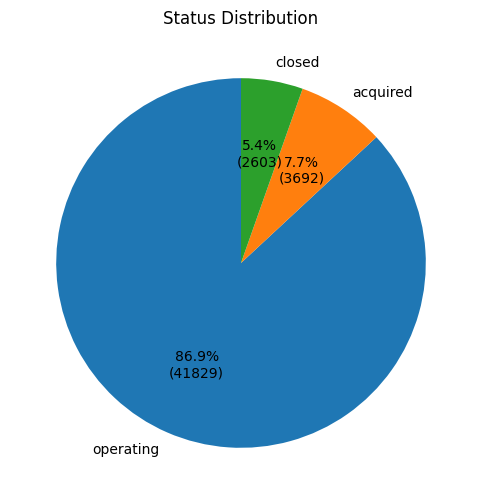

In [ ]:
plt.figure(figsize=(8, 6))

# Define a custom function to show both percentage and count
def autopct_format(pct, all_vals):
    total = sum(all_vals)
    val = int(round(pct * total / 100.0))  # Calculate the original value
    return f'{pct:.1f}%\n({val})'         # Format to show percentage and value

# Plot the pie chart
counts = df['status'].value_counts()  # Get the counts of each status
plt.pie(counts,
        labels=counts.index,
        autopct=lambda pct: autopct_format(pct, counts),
        startangle=90)
plt.title('Status Distribution')
plt.show()


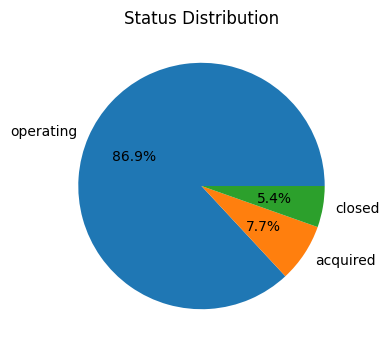

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(df['status'].value_counts(), labels=df['status'].value_counts().index, autopct='%1.1f%%')
plt.title('Status Distribution')
plt.show()

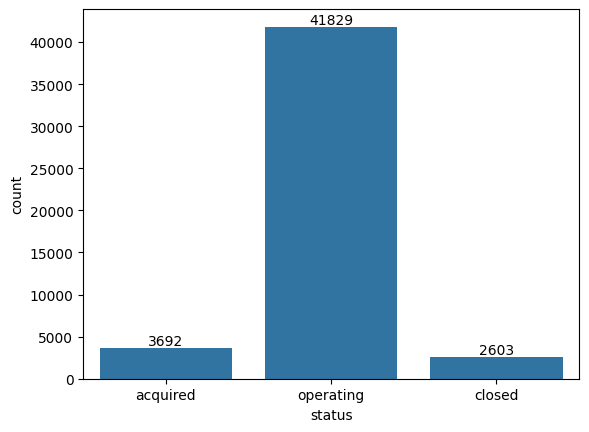

In [ ]:
ax=sns.countplot(x='status',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

30107 startups are currently operational and 2870 startups have been acquired and 1540 startups have shut down

# Total Funding, Average Funding, Funding Count and Funding distribution by Market

In [ ]:
def funding_statistics(data, group_by_cols, funding_col='funding_total_usd'):
    """
    This function calculates total funding, average funding, and funding distribution statistics
    for specified grouping columns.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    group_by_cols (list): List of columns to group by (e.g., ['market'], ['country'], ['region', 'state'], etc.).
    funding_col (str): The column name for funding data (default is 'funding_total_usd').

    Returns:
    pd.DataFrame: A DataFrame with the total funding, average funding, and funding distribution.
    """

    # Check if funding column contains valid numeric data
    data[funding_col] = pd.to_numeric(data[funding_col], errors='coerce')

    # Group by the specified columns and calculate total and average funding
    funding_summary = data.groupby(group_by_cols)[funding_col].agg(
        total_funding='sum',  # Sum of funding
        avg_funding='mean',   # Average funding
        funding_count='count' # Count of funding instances
    ).reset_index()

    # Calculate the funding distribution (percentage share of each group)
    total_funding_all = funding_summary['total_funding'].sum()
    funding_summary['funding_distribution'] =(funding_summary['total_funding'] / total_funding_all) * 100
    #funding_summary['funding_distribution'] = funding_summary['funding_distribution'].map('{:.3f}%'.format)
    #funding_summary['avg_funding'] = funding_summary['avg_funding'].apply(lambda x: f"{x:,.2f}")
    #funding_summary['total_funding'] = funding_summary['total_funding'].apply(lambda x: f"{x:,.2f}")

    return funding_summary

In [ ]:
# For total funding, average funding, and distribution by market
market_funding_stats = funding_statistics(df, ['market'])
market_funding_stats

,market,total_funding,avg_funding,funding_count,funding_distribution
0,3D,98325062.0,3.933002e+06,25,0.015723
1,3D Printing,32454000.0,3.606000e+06,9,0.005190
2,3D Technology,20645352.0,2.580669e+06,8,0.003301
3,Accounting,311455618.0,1.730309e+07,18,0.049804
4,Ad Targeting,179329558.0,1.379458e+07,13,0.028676
...,...,...,...,...,...
748,iOS,221407342.0,4.612653e+06,48,0.035404
749,iPad,51562714.0,1.778025e+06,29,0.008245
750,iPhone,210124149.0,3.045278e+06,69,0.033600
751,iPod Touch,4338000.0,1.446000e+06,3,0.000694


In [ ]:
#market_funding_stats['total_funding']=pd.to_numeric(market_funding_stats['total_funding'], errors='coerce')
#market_funding_stats['avg_funding']=pd.to_numeric(market_funding_stats['avg_funding'], errors='coerce')
top_10_markets_funds = market_funding_stats.sort_values(by='total_funding', ascending=False).head(10)
top_10_markets_avg = market_funding_stats.sort_values(by='avg_funding', ascending=False).head(10)
top_10_markets_count = market_funding_stats.sort_values(by='funding_count', ascending=False).head(10)
top_10_markets_dist = market_funding_stats.sort_values(by='funding_distribution', ascending=False).head(10)

In [ ]:
def plot_top_10(data, x, y, title, xlabel):
    plt.figure(figsize=(12,4))
    g=sns.barplot(x=x, y=y, data=data, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(y)
    plt.xticks(rotation=45, ha='right')
    for bars in g.containers:
      g.bar_label(bars, fmt='%.0f', labels=[f'{v:,.0f}' for v in bars.datavalues])

    plt.tight_layout()
    plt.show()

In [ ]:
df['funding_total_usd'].sum()

534472078295.0

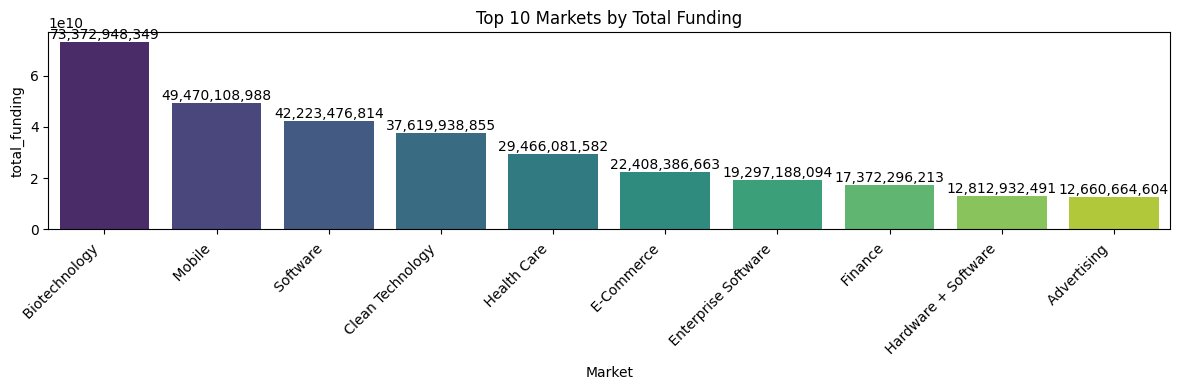

In [ ]:
plot_top_10(top_10_markets_funds, 'market', 'total_funding', 'Top 10 Markets by Total Funding', 'Market')

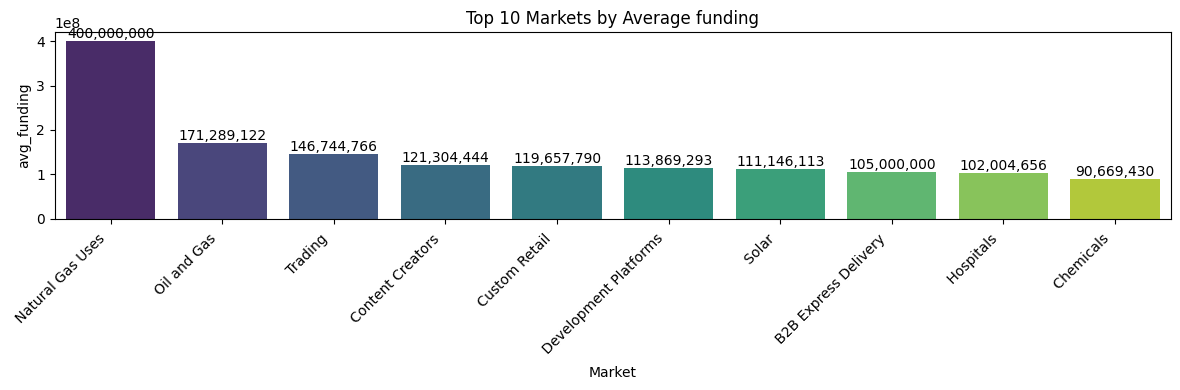

In [ ]:
plot_top_10(top_10_markets_avg, 'market', 'avg_funding', 'Top 10 Markets by Average funding', 'Market')

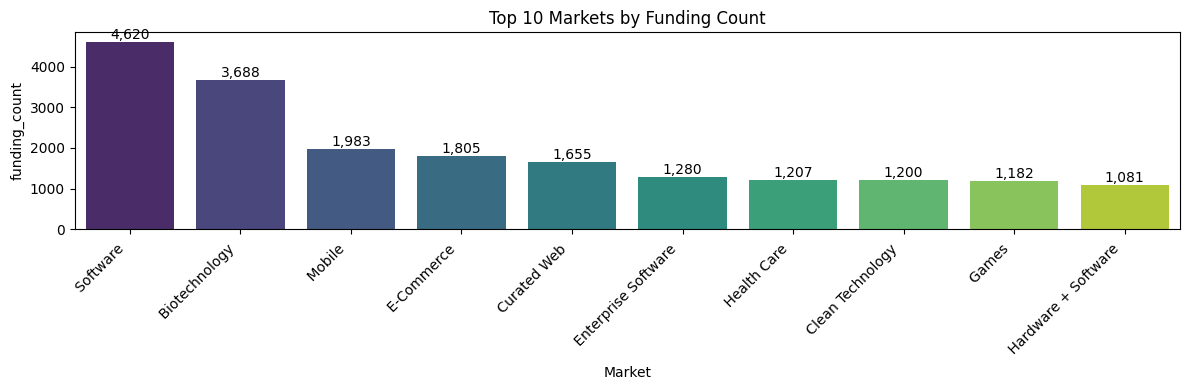

In [ ]:
plot_top_10(top_10_markets_count, 'market', 'funding_count', 'Top 10 Markets by Funding Count', 'Market')

In [ ]:
def plot_pie_chart(data, labels_column, values_column, title):
    plt.figure(figsize=(4,4))

    # Extract labels and values for the pie chart
    labels = data[labels_column]
    values = data[values_column]

    # Plot the pie chart
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


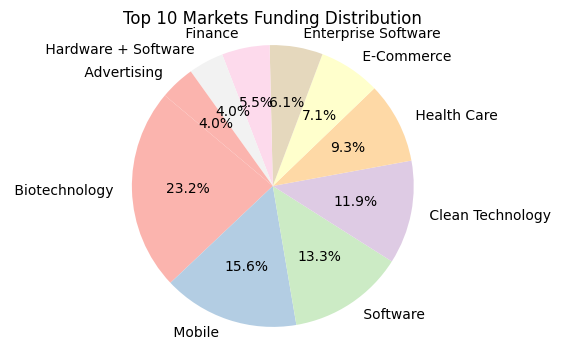

In [ ]:
plot_pie_chart(top_10_markets_dist, 'market', 'funding_distribution', 'Top 10 Markets Funding Distribution')

Observations:
* **Top Markets by Total Funding:** Biotechnology, Mobile, Software, Clean Technology, and Healthcare.
* **Top Markets by Average Funding:** Natural Gas Uses, Oil & Gas, and Trading.
* **Top Markets by Funding Count:** Software, Biotechnology, and Mobile.

# Total Funding, Average Funding, Funding Count and Funding distribution by Country

In [ ]:
# For total funding, average funding, and distribution by country
country_funding_stats = funding_statistics(df, ['country_code'])
country_funding_stats

,country_code,total_funding,avg_funding,funding_count,funding_distribution
0,ALB,6.500000e+05,2.166667e+05,3,0.000103
1,ARE,6.489352e+08,9.543165e+06,68,0.103055
2,ARG,2.668057e+08,1.755300e+06,152,0.042371
3,ARM,3.547416e+07,5.912361e+06,6,0.005634
4,ASM,3.625000e+06,3.625000e+06,1,0.000576
5,ATG,7.444500e+06,3.722250e+06,2,0.001182
6,AUS,2.771918e+09,8.476813e+06,327,0.440199
7,AUT,4.965809e+08,4.729342e+06,105,0.078860
8,AZE,3.740000e+05,9.350000e+04,4,0.000059
9,BEL,1.245332e+09,8.139426e+06,153,0.197767


In [ ]:
top_10_country_funds = country_funding_stats.sort_values(by='total_funding', ascending=False).head(10)
top_10_country_avg = country_funding_stats.sort_values(by='avg_funding', ascending=False).head(10)
top_10_country_count = country_funding_stats.sort_values(by='funding_count', ascending=False).head(10)
top_10_country_dist = country_funding_stats.sort_values(by='funding_distribution', ascending=False).head(10)

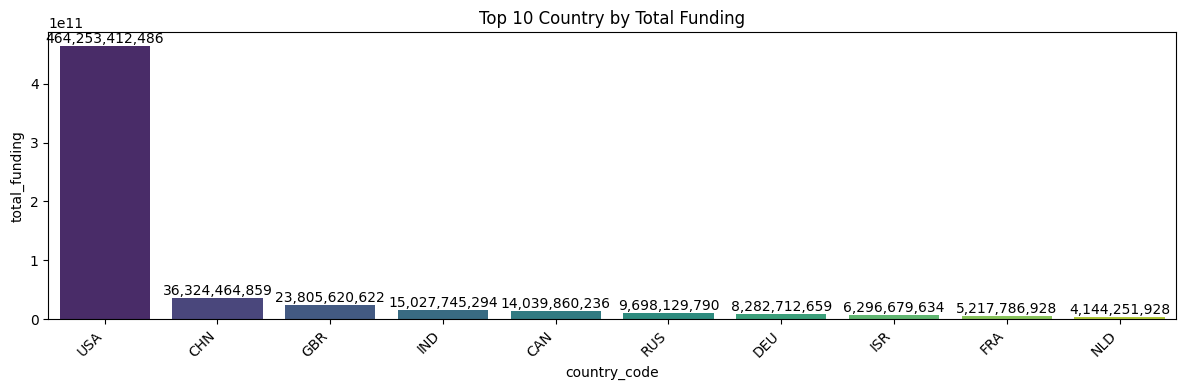

In [ ]:
plot_top_10(top_10_country_funds, 'country_code', 'total_funding', 'Top 10 Country by Total Funding', 'country_code')

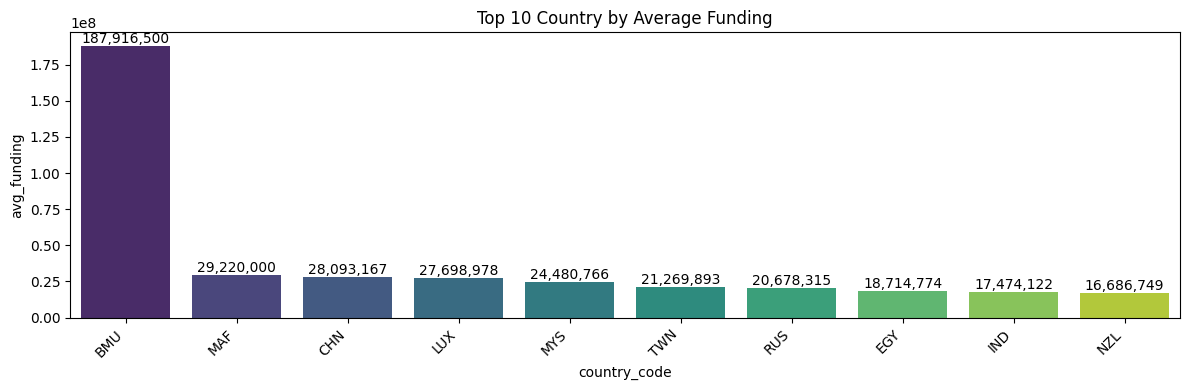

In [ ]:
plot_top_10(top_10_country_avg, 'country_code', 'avg_funding', 'Top 10 Country by Average Funding', 'country_code')

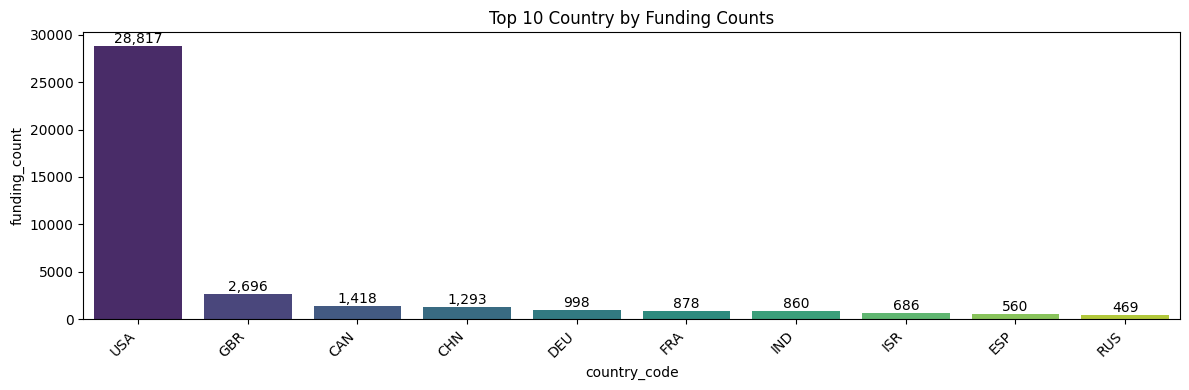

In [ ]:
plot_top_10(top_10_country_count, 'country_code', 'funding_count', 'Top 10 Country by Funding Counts', 'country_code')

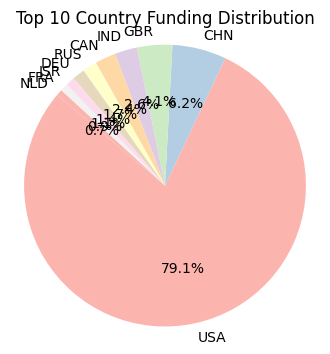

In [ ]:
plot_pie_chart(top_10_country_dist, 'country_code', 'funding_distribution', 'Top 10 Country Funding Distribution')

Observations:

* **Top Country by Total Funding:** USA, CHN, GBR, IND AND CAN
* **Top Country by Average Funding:** BMU,MAF, CHN
* **Top Country by Founding Count:** USA,GBR, CAN.

# Total Funding, Average Funding, Funding Count and Funding distribution by Region

In [ ]:
# For total funding, average funding, and distribution by region
region_funding_stats = funding_statistics(df, ['region'])
region_funding_stats

,region,total_funding,avg_funding,funding_count,funding_distribution
0,A Coruna,4.947720e+06,1.236930e+06,4,0.000786
1,AB - Other,2.307500e+07,3.296429e+06,7,0.003664
2,AK - Other,8.850000e+06,2.212500e+06,4,0.001405
3,AL - Other,1.114637e+09,6.966481e+07,16,0.177012
4,AR - Other,2.917444e+06,1.458722e+05,20,0.000463
...,...,...,...,...,...
1085,Zhengzhou,1.721373e+07,5.737911e+06,3,0.002734
1086,Zhuhai,3.042155e+08,7.605386e+07,4,0.048311
1087,Zurich,6.101537e+08,8.028338e+06,76,0.096896
1088,Çan,3.294481e+08,9.983275e+06,33,0.052319


In [ ]:
top_10_region_funds = region_funding_stats.sort_values(by='total_funding', ascending=False).head(10)
top_10_region_avg = region_funding_stats.sort_values(by='avg_funding', ascending=False).head(10)
top_10_region_count = region_funding_stats.sort_values(by='funding_count', ascending=False).head(10)
top_10_region_dist = region_funding_stats.sort_values(by='funding_distribution', ascending=False).head(10)

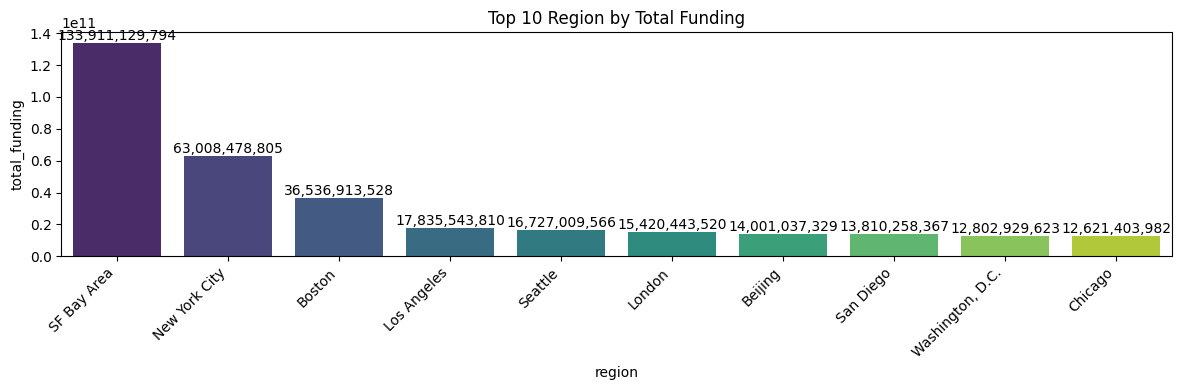

In [ ]:
plot_top_10(top_10_region_funds, 'region', 'total_funding', 'Top 10 Region by Total Funding', 'region')

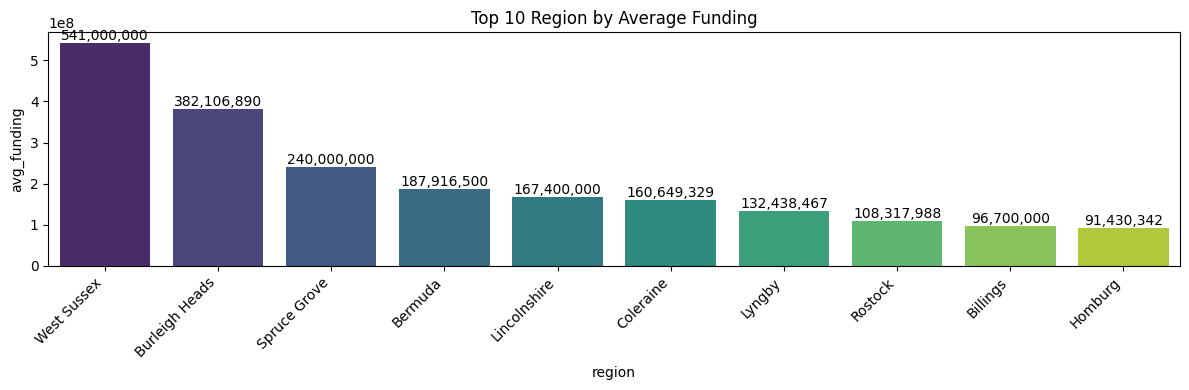

In [ ]:
plot_top_10(top_10_region_avg, 'region', 'avg_funding', 'Top 10 Region by Average Funding', 'region')

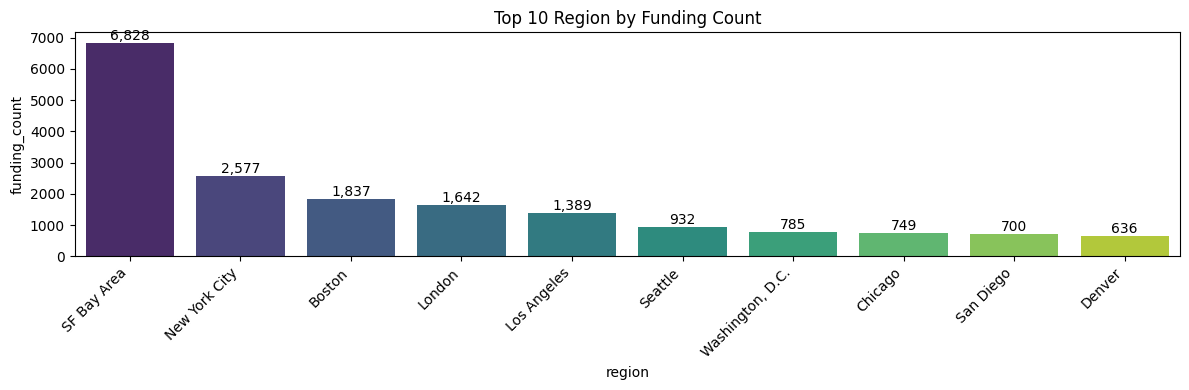

In [ ]:
plot_top_10(top_10_region_count, 'region', 'funding_count', 'Top 10 Region by Funding Count', 'region')

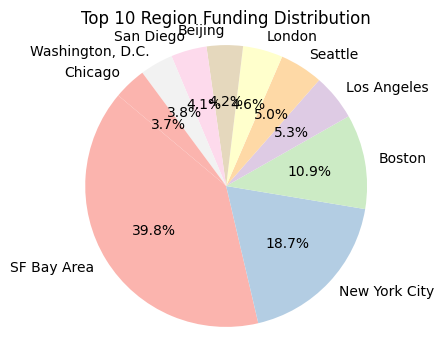

In [ ]:
plot_pie_chart(top_10_region_dist, 'region', 'funding_distribution', 'Top 10 Region Funding Distribution')

Observations:

* **Top Region by Total Funding:** SF Bay Area, NewYork City and Boston
* **Top Region by Average Funding:** West Sussex, Butleigh Heads,
* **Top Region by Founding Count:** SF Bay Area, NewYork City and Boston.

# Total Funding, Average Funding, Funding Count and Funding distribution by State

In [ ]:
# For total funding, average funding, and distribution by state and city together
state_funding_stats = funding_statistics(df, ['state_code'])
state_funding_stats

,state_code,total_funding,avg_funding,funding_count,funding_distribution
0,AB,1.886735e+09,1.640640e+07,115,0.394669
1,AK,1.485042e+07,1.237535e+06,12,0.003106
2,AL,1.674069e+09,1.594351e+07,105,0.350184
3,AR,2.855398e+08,1.613219e+06,177,0.059730
4,AZ,2.843284e+09,8.695058e+06,327,0.594761
5,BC,2.171049e+09,6.827197e+06,318,0.454142
6,CA,1.792780e+11,1.807785e+07,9917,37.501575
7,CO,8.839147e+09,1.222565e+07,723,1.848983
8,CT,9.167208e+09,2.901015e+07,316,1.917607
9,DC,2.197159e+09,1.207230e+07,182,0.459604


In [ ]:
top_10_state_funds = state_funding_stats.sort_values(by='total_funding', ascending=False).head(10)
top_10_state_avg = state_funding_stats.sort_values(by='avg_funding', ascending=False).head(10)
top_10_state_count = state_funding_stats.sort_values(by='funding_count', ascending=False).head(10)
top_10_state_dist = state_funding_stats.sort_values(by='funding_distribution', ascending=False).head(10)

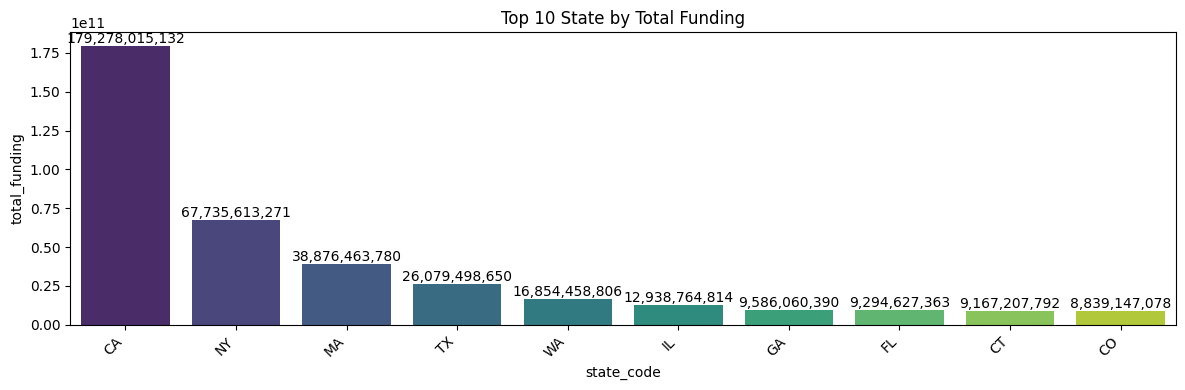

In [ ]:
plot_top_10(top_10_state_funds, 'state_code', 'total_funding', 'Top 10 State by Total Funding', 'state_code')

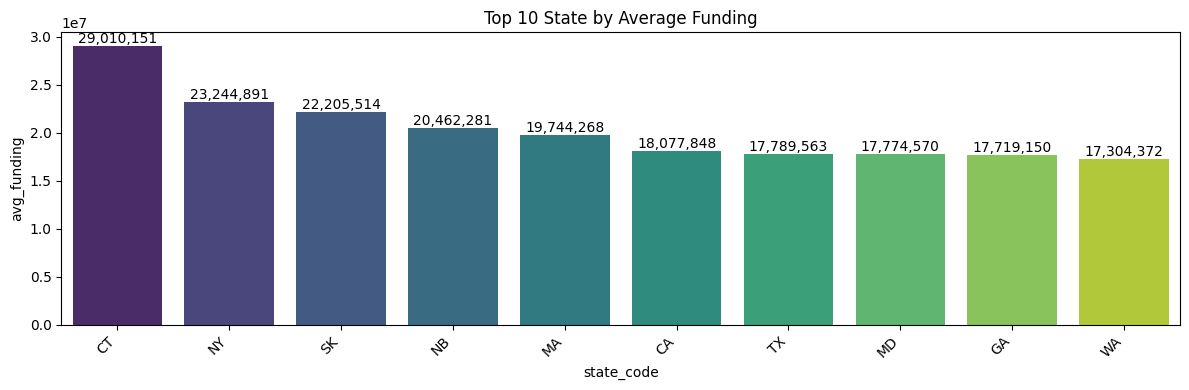

In [ ]:
plot_top_10(top_10_state_avg, 'state_code', 'avg_funding', 'Top 10 State by Average Funding', 'state_code')

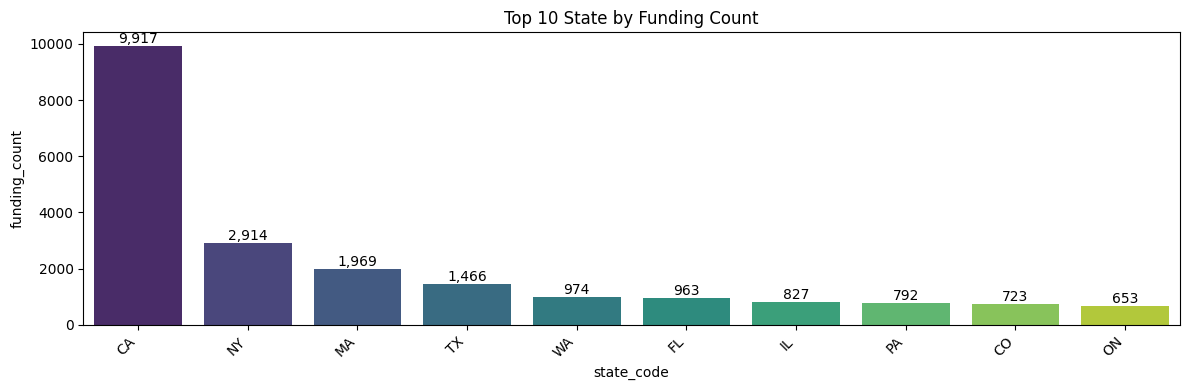

In [ ]:
plot_top_10(top_10_state_count, 'state_code', 'funding_count', 'Top 10 State by Funding Count', 'state_code')

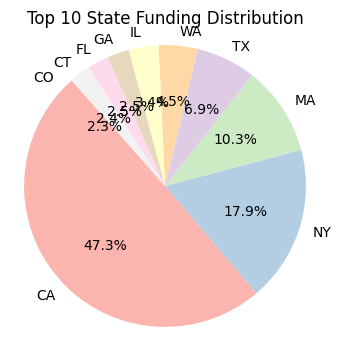

In [ ]:
plot_pie_chart(top_10_state_dist, 'state_code', 'funding_distribution', 'Top 10 State Funding Distribution')

Observations:

* **Top State by Total Funding:** CA,NY and MA
* **Top State by Average Funding:** CT, NY and SK
* **Top State by Founding Count:** CA, NY and MA

# Total Funding, Average Funding, Funding Count and Funding distribution by City

In [ ]:
funding_statistics(df,['city'])

,city,total_funding,avg_funding,funding_count,funding_distribution
0,'s-hertogenbosch,0.0,0.000000e+00,1,0.000000
1,6 October City,145000.0,1.450000e+05,1,0.000024
2,A Coruña,4947720.0,1.236930e+06,4,0.000804
3,Aachen,45141916.0,6.448845e+06,7,0.007339
4,Aalborg,350000.0,1.166667e+05,3,0.000057
...,...,...,...,...,...
4183,Évora,0.0,0.000000e+00,1,0.000000
4184,Évry,663754.0,2.212513e+05,3,0.000108
4185,Ísafjörður,4000000.0,4.000000e+06,1,0.000650
4186,Örnsköldsvik,0.0,0.000000e+00,1,0.000000


In [ ]:
# For total funding, average funding, and distribution by state and city together
city_funding_stats = funding_statistics(df, ['city'])
city_funding_stats

,city,total_funding,avg_funding,funding_count,funding_distribution
0,'s-hertogenbosch,0.0,0.000000e+00,1,0.000000
1,6 October City,145000.0,1.450000e+05,1,0.000024
2,A Coruña,4947720.0,1.236930e+06,4,0.000804
3,Aachen,45141916.0,6.448845e+06,7,0.007339
4,Aalborg,350000.0,1.166667e+05,3,0.000057
...,...,...,...,...,...
4183,Évora,0.0,0.000000e+00,1,0.000000
4184,Évry,663754.0,2.212513e+05,3,0.000108
4185,Ísafjörður,4000000.0,4.000000e+06,1,0.000650
4186,Örnsköldsvik,0.0,0.000000e+00,1,0.000000


In [ ]:
top_10_city_funds = city_funding_stats.sort_values(by='total_funding', ascending=False).head(10)
top_10_city_avg = city_funding_stats.sort_values(by='avg_funding', ascending=False).head(10)
top_10_city_count = city_funding_stats.sort_values(by='funding_count', ascending=False).head(10)
top_10_city_dist = city_funding_stats.sort_values(by='funding_distribution', ascending=False).head(10)

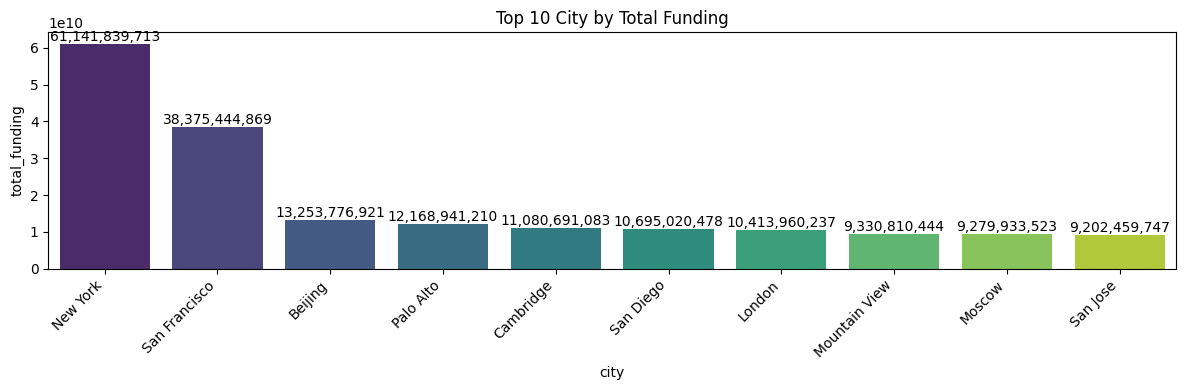

In [ ]:
plot_top_10(top_10_city_funds, 'city', 'total_funding', 'Top 10 City by Total Funding', 'city')

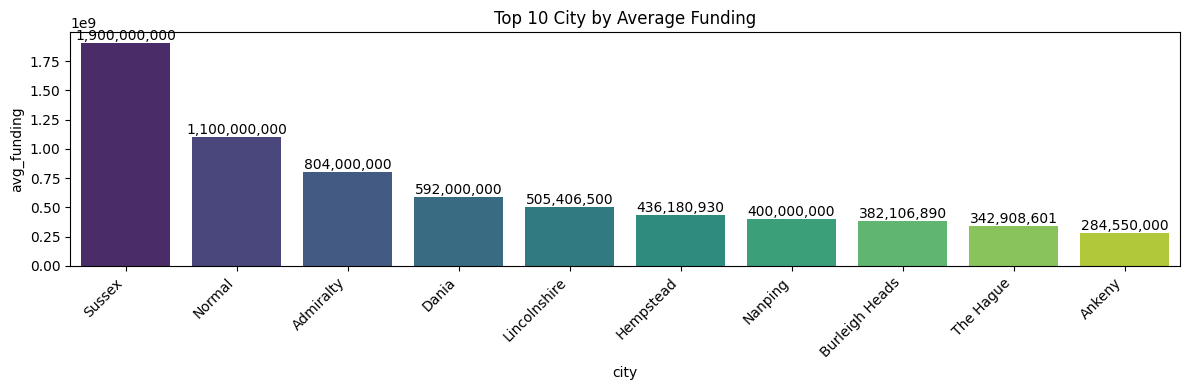

In [ ]:
plot_top_10(top_10_city_avg, 'city', 'avg_funding', 'Top 10 City by Average Funding', 'city')

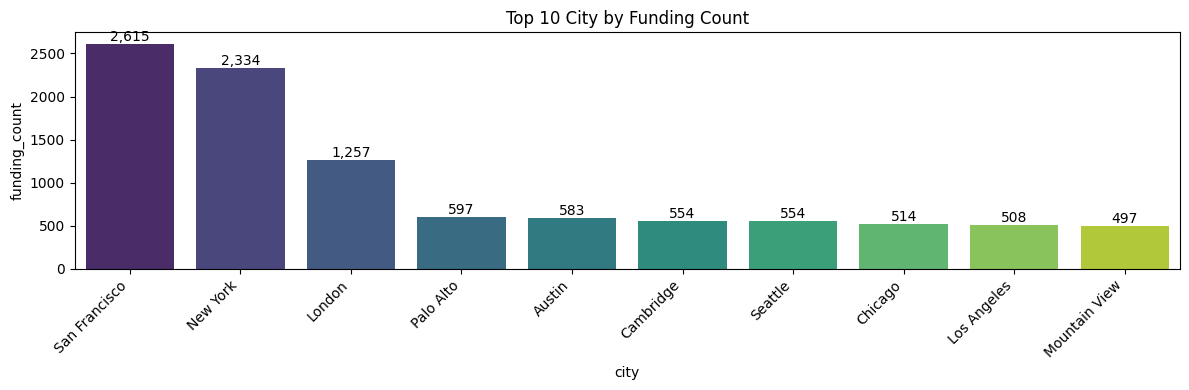

In [ ]:
plot_top_10(top_10_city_count, 'city', 'funding_count', 'Top 10 City by Funding Count', 'city')

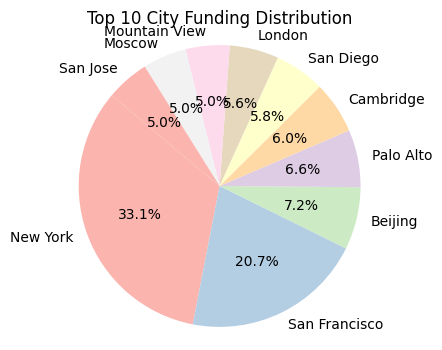

In [ ]:
plot_pie_chart(top_10_city_dist, 'city', 'funding_distribution', 'Top 10 City Funding Distribution')

Observations:

* **Top City by Total Funding:** NewYork, San Francisco and Beijing
* **Top City by Average Funding:** Sussex, Normal and Admiralty
* **Top City by Founding Count:** San Francisco, New York and London

# Correlation between total funding vs founded year

In [ ]:
df['founded_year']

,founded_year
0,1970-01-01 00:00:00.000002012
1,NaN
2,1970-01-01 00:00:00.000002012
3,1970-01-01 00:00:00.000002011
4,1970-01-01 00:00:00.000002014
...,...
49433,1970-01-01 00:00:00.000002013
49434,NaN
49435,1970-01-01 00:00:00.000002012
49436,NaN


In [ ]:
df[['total_funding_usd','founded_at']].corr()

,total_funding_usd,founded_at
total_funding_usd,1.000000,0.013602
founded_at,0.013602,1.000000


Insights:
There is a very weak positive correlation (0.0136) between total_funding_usd and founded_at. This suggests that the year a company was founded has almost no direct relationship with the total funding it has received.

In [ ]:
df['founded_year_extract'] = pd.to_datetime(df['founded_year'], format='%Y', errors='coerce').dt.year

In [ ]:
df['founded_year_extract']

,founded_year_extract
0,1970.0
1,NaN
2,1970.0
3,1970.0
4,1970.0
...,...
49433,1970.0
49434,NaN
49435,1970.0
49436,NaN


# Analyzing Funding Trends by Year

In [ ]:
# Convert relevant date column to datetime if needed
df['founded_year'] = pd.to_datetime(df['founded_at']).dt.year

# Group by year and calculate total funding
funding_by_year = df.groupby('founded_year')['funding_total_usd'].sum().reset_index()

# Drop rows with missing years
funding_by_year = funding_by_year.dropna()

# Sort data by year
funding_by_year = funding_by_year.sort_values('founded_year')

print(funding_by_year)


     founded_year  funding_total_usd
0          1785.0       2.000000e+06
1          1802.0       9.000000e+06
2          1817.0       7.700000e+06
3          1826.0       5.400000e+05
4          1831.0       1.900000e+07
5          1834.0       1.200000e+07
6          1838.0       1.470000e+07
7          1840.0       3.150000e+07
8          1845.0       2.705000e+06
9          1847.0       8.900000e+06
10         1850.0       0.000000e+00
11         1853.0       8.000000e+06
12         1854.0       0.000000e+00
13         1855.0       3.900000e+06
14         1856.0       7.525000e+08
15         1857.0       0.000000e+00
16         1859.0       1.750000e+08
17         1860.0       1.730404e+07
18         1861.0       9.000000e+07
19         1862.0       1.976340e+05
20         1863.0       4.850000e+07
21         1864.0       1.340000e+07
22         1865.0       2.010000e+08
23         1869.0       2.550000e+06
24         1870.0       0.000000e+00
25         1871.0       1.400000e+06
2

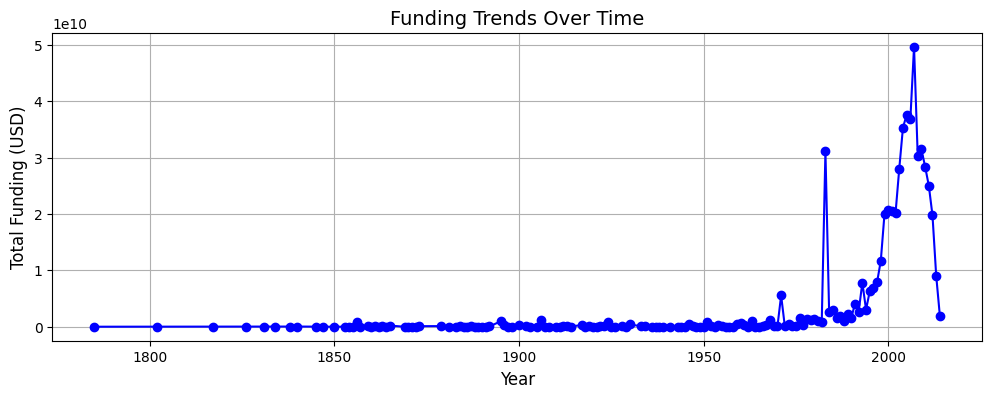

In [ ]:
# Line Chart for Funding Trends
plt.figure(figsize=(12,4))
plt.plot(funding_by_year['founded_year'], funding_by_year['funding_total_usd'], marker='o', color='blue')
plt.title('Funding Trends Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Funding (USD)', fontsize=12)
plt.grid(True)
plt.show()


# Year over year growth in funding for each market

In [ ]:
# Step 1: Group by market and year, then sum funding
grouped_data = df.groupby(['market', 'founded_at'])['funding_total_usd'].sum().reset_index()

# Step 2: Calculate Year-over-Year Growth
grouped_data['YoY_growth'] = grouped_data.groupby('market')['funding_total_usd'].pct_change() * 100

# Step 3: Display the result
print(grouped_data)



          market founded_at  funding_total_usd   YoY_growth
0            3D  2002-05-17                0.0          NaN
1            3D  2005-03-01         18000000.0          inf
2            3D  2007-02-01         19679275.0     9.329306
3            3D  2010-01-01          3325000.0   -83.104052
4            3D  2010-03-01           390000.0   -88.270677
...          ...        ...                ...          ...
16784   mHealth  2012-05-01           619328.0  1964.426667
16785   mHealth  2013-01-01           276672.0   -55.327064
16786   mHealth  2013-02-01          3300000.0  1092.748092
16787   mHealth  2014-02-28                0.0  -100.000000
16788   mHealth  2014-08-11            25000.0          inf

[16789 rows x 4 columns]


# Most common Funding Type in Market

Top Sectors and Their Most Common Funding Type:
                    market most_common_funding  highest_funding_amount
55          Biotechnology              venture            3.711160e+10
408                Mobile       debt_financing            3.115361e+10
610              Software              venture            2.568872e+10
88       Clean Technology              venture            1.537524e+10
293           Health Care              venture            1.479769e+10
192            E-Commerce              venture            1.301898e+10
225   Enterprise Software              venture            1.247175e+10
7             Advertising              venture            9.396025e+09
570        Semiconductors              venture            8.452689e+09
292   Hardware + Software              venture            6.999030e+09


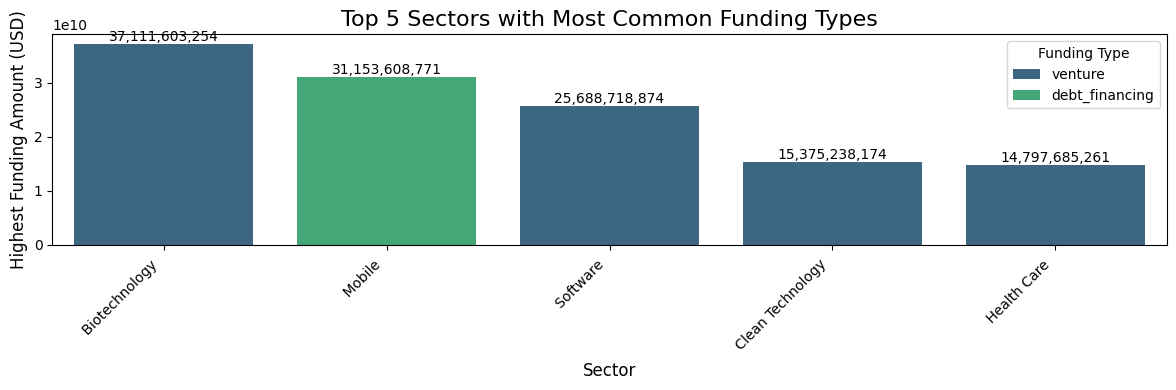

In [ ]:
# Filter relevant columns for funding types and categories
funding_cols = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding','round_A', 'round_B', 'round_C',
    'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

relevant_data = df[['market'] + funding_cols].copy()

# Fill missing values in funding columns with 0 (assuming no funding means 0)
relevant_data[funding_cols] = relevant_data[funding_cols].fillna(0)

# Group by category_list and calculate the total funding for each type
funding_by_sector = relevant_data.groupby('market')[funding_cols].sum()

# Find the most common funding type for each sector
funding_by_sector['most_common_funding'] = funding_by_sector.idxmax(axis=1)
funding_by_sector['highest_funding_amount'] = funding_by_sector.select_dtypes(include='number').max(axis=1)

# Reset index for visualization
funding_by_sector = funding_by_sector.reset_index()

# Display top sectors and their most common funding type
top_sectors = funding_by_sector.nlargest(10, 'highest_funding_amount')

print("Top Sectors and Their Most Common Funding Type:")
print(top_sectors[['market', 'most_common_funding', 'highest_funding_amount']])

# Visualize the results
def plot_top_funding_types(data, top_n=5):
    plt.figure(figsize=(12,4))

    # Select top N sectors by highest funding amount
    top_data = data.nlargest(top_n, 'highest_funding_amount')

    g=sns.barplot(
        data=top_data,
        x='market',
        y='highest_funding_amount',
        hue='most_common_funding',
        palette='viridis'
    )
    plt.title(f"Top {top_n} Sectors with Most Common Funding Types", fontsize=16)
    plt.xlabel("Sector", fontsize=12)
    plt.ylabel("Highest Funding Amount (USD)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Funding Type", fontsize=10)
    for bars in g.containers:
      g.bar_label(bars, fmt='%.0f', labels=[f'{v:,.0f}' for v in bars.datavalues])
    plt.tight_layout()
    plt.show()

# Plot the results
plot_top_funding_types(funding_by_sector)


Observed that most common funding type is Venture

# Funding Rounds Analysis

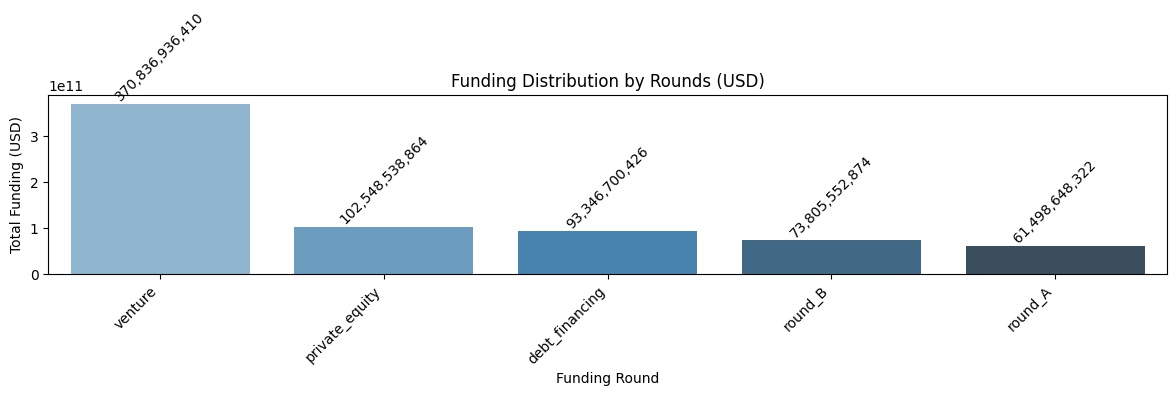

In [ ]:
# Select funding round columns
funding_rounds = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note','debt_financing','angel',
                                 'grant', 'private_equity', 'post_ipo_equity','post_ipo_debt', 'secondary_market', 'product_crowdfunding',
                  'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
rounds_data = df[funding_rounds].sum().sort_values(ascending=False).head(5)

# Visualize funding by rounds
plt.figure(figsize=(12,4))
g=sns.barplot(x=rounds_data.index, y=rounds_data.values, palette="Blues_d")
plt.title('Funding Distribution by Rounds (USD)')
plt.xlabel('Funding Round')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45, ha='right')
for bars in g.containers:
  g.bar_label(bars, fmt='%.0f', labels=[f'{v:,.0f}' for v in bars.datavalues],rotation=45)
plt.tight_layout()
plt.show()


**Venture Funding Dominates:** The majority of funds are concentrated in the Venture funding round, indicating it as the primary source of capital for companies in this dataset.

# Niche Market Analysis

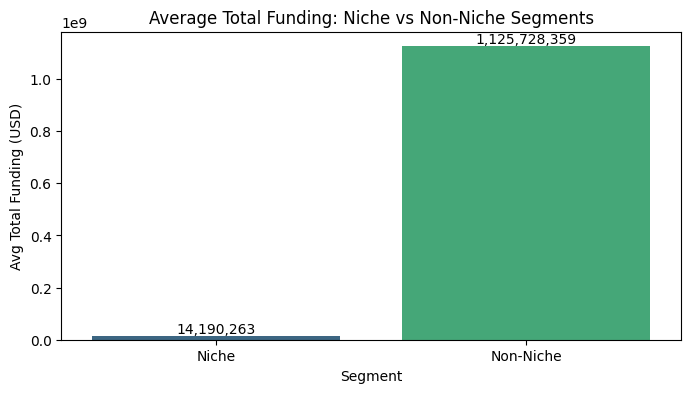

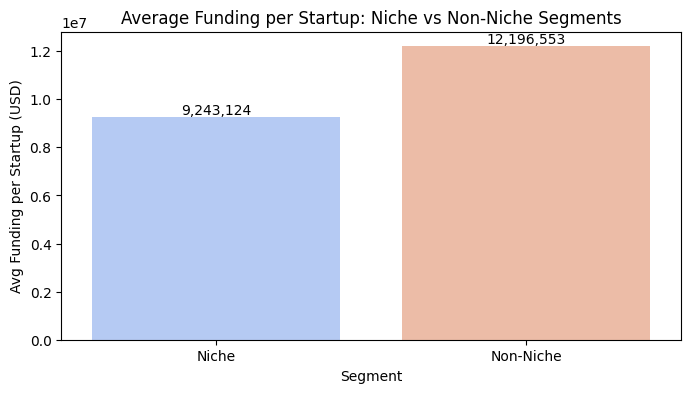

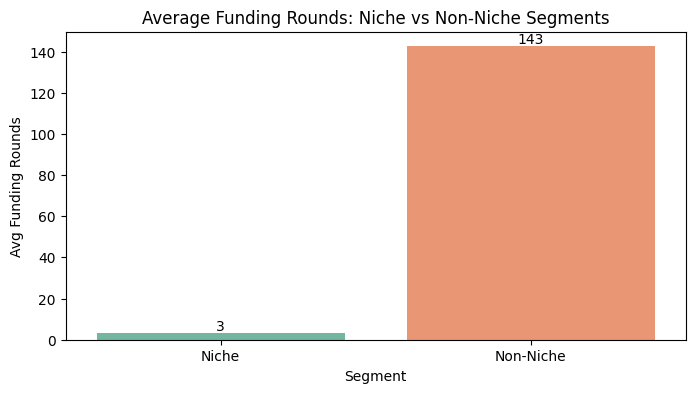

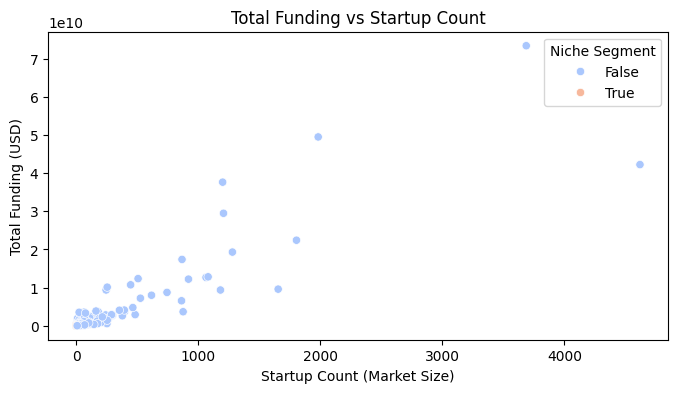

In [ ]:
# Ensure funding_total_usd column is numeric
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

# Step 1: Group by Market/Category
market_stats = df.groupby('market').agg(
    total_funding=('funding_total_usd', 'sum'),
    avg_funding=('funding_total_usd', 'mean'),
    funding_rounds=('funding_rounds', 'sum'),
    startup_count=('market', 'count')
).reset_index()

# Step 2: Define Niche Segments
# Set a threshold for niche segments (bottom 25% by startup count)
niche_threshold = market_stats['startup_count'].quantile(0.25)
market_stats['is_niche'] = market_stats['startup_count'] <= niche_threshold

# Step 3: Compare Metrics for Niche vs Non-Niche
niche_stats = market_stats[market_stats['is_niche'] == True]
non_niche_stats = market_stats[market_stats['is_niche'] == False]

# Calculate average funding and returns for niche vs non-niche
comparison = {
    "Segment": ["Niche", "Non-Niche"],
    "Avg Total Funding": [niche_stats['total_funding'].mean(), non_niche_stats['total_funding'].mean()],
    "Avg Funding per Startup": [niche_stats['avg_funding'].mean(), non_niche_stats['avg_funding'].mean()],
    "Avg Funding Rounds": [niche_stats['funding_rounds'].mean(), non_niche_stats['funding_rounds'].mean()]
}
comparison_df = pd.DataFrame(comparison)

# Step 4: Visualize the Comparison
plt.figure(figsize=(8,4))
g=sns.barplot(x='Segment', y='Avg Total Funding', data=comparison_df, palette='viridis')
plt.title('Average Total Funding: Niche vs Non-Niche Segments')
plt.ylabel('Avg Total Funding (USD)')
for bars in g.containers:
  g.bar_label(bars, fmt='%.0f', labels=[f'{v:,.0f}' for v in bars.datavalues])
plt.show()

plt.figure(figsize=(8,4))
g=sns.barplot(x='Segment', y='Avg Funding per Startup', data=comparison_df, palette='coolwarm')
plt.title('Average Funding per Startup: Niche vs Non-Niche Segments')
plt.ylabel('Avg Funding per Startup (USD)')
for bars in g.containers:
  g.bar_label(bars, fmt='%.0f', labels=[f'{v:,.0f}' for v in bars.datavalues])
plt.show()

plt.figure(figsize=(8,4))
g=sns.barplot(x='Segment', y='Avg Funding Rounds', data=comparison_df, palette='Set2')
plt.title('Average Funding Rounds: Niche vs Non-Niche Segments')
plt.ylabel('Avg Funding Rounds')
for bars in g.containers:
  g.bar_label(bars, fmt='%.0f', labels=[f'{v:,.0f}' for v in bars.datavalues])
plt.show()

# Step 5: Scatter Plot to Analyze Total Funding by Startup Count
plt.figure(figsize=(8,4))
sns.scatterplot(data=market_stats, x='startup_count', y='total_funding', hue='is_niche', palette='coolwarm')
plt.title('Total Funding vs Startup Count')
plt.xlabel('Startup Count (Market Size)')
plt.ylabel('Total Funding (USD)')
plt.legend(title='Niche Segment')
plt.show()


In [ ]:
niche_stats.sort_values(by='total_funding', ascending=False).head(5)

,market,total_funding,avg_funding,funding_rounds,startup_count,is_niche
456,Natural Gas Uses,400000000.0,400000000.0,1.0,1,True
559,Recreation,128660000.0,64330000.0,2.0,2,True
154,Custom Retail,119657790.0,119657790.0,1.0,1,True
42,B2B Express Delivery,105000000.0,105000000.0,4.0,1,True
102,Cloud-Based Music,104000000.0,52000000.0,2.0,2,True


In [ ]:
non_niche_stats.sort_values(by='total_funding', ascending=False).head(5)

,market,total_funding,avg_funding,funding_rounds,startup_count,is_niche
59,Biotechnology,7.337295e+10,1.989505e+07,7652.0,3688,False
425,Mobile,4.947011e+10,2.494710e+07,3570.0,1983,False
636,Software,4.222348e+10,9.139281e+06,7633.0,4620,False
94,Clean Technology,3.761994e+10,3.134995e+07,2190.0,1200,False
305,Health Care,2.946608e+10,2.441266e+07,2777.0,1207,False


**Non-Niche Markets Lead in Funding:**
Non-Niche markets have the highest average total funding, the highest average funding per startup, and the most funding counts, indicating that these markets attract a larger volume of investments compared to niche markets.

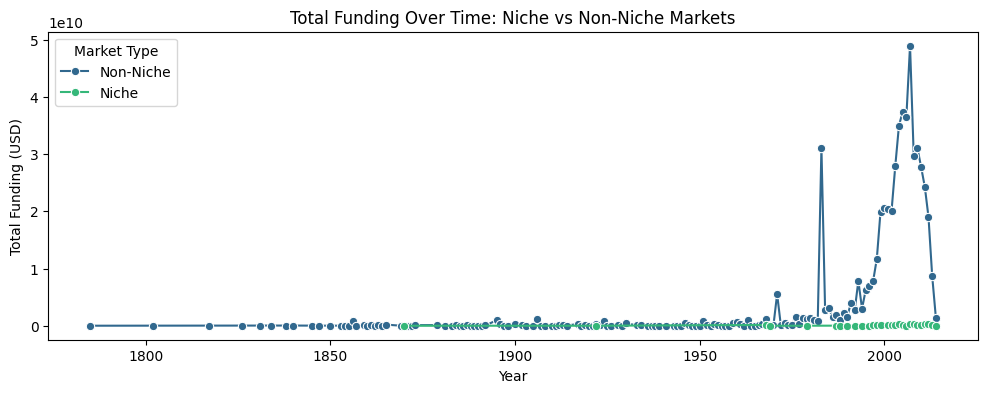

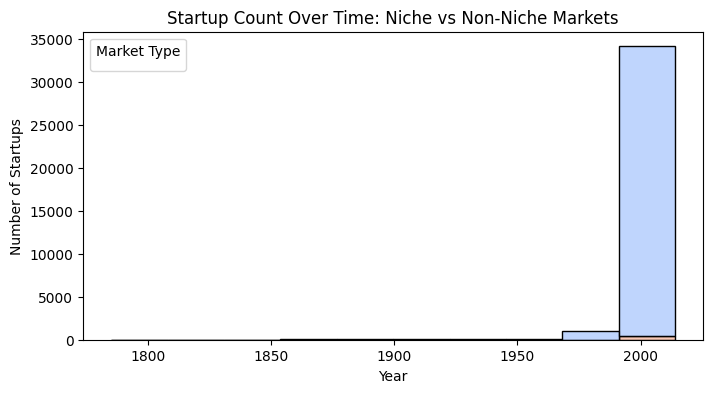

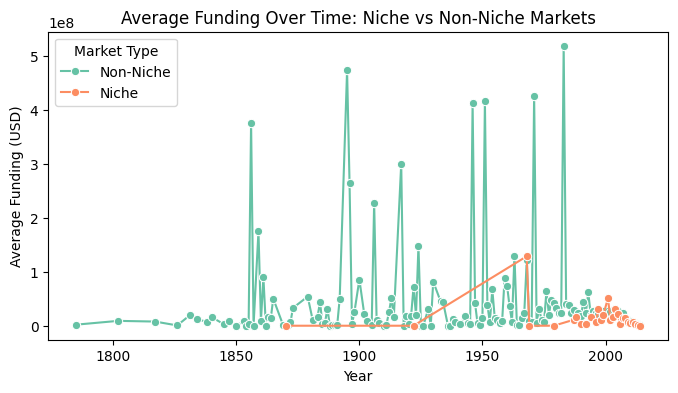

In [ ]:
# Convert founded_at to datetime and extract the year
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['founded_year'] = df['founded_at'].dt.year

# Group by market to identify niche markets
market_startup_count = df.groupby('market')['name'].count().reset_index()
market_startup_count.rename(columns={'name': 'startup_count'}, inplace=True)

# Define niche markets (bottom 25%)
niche_threshold = market_startup_count['startup_count'].quantile(0.25)
niche_markets = market_startup_count[market_startup_count['startup_count'] <= niche_threshold]['market']

# Add a column to identify niche markets
df['is_niche'] = df['market'].apply(lambda x: 'Niche' if x in niche_markets.values else 'Non-Niche')

# Group by year and niche type
time_niche_analysis = df.groupby(['founded_year', 'is_niche']).agg({
    'funding_total_usd': 'sum',
    'name': 'count'
}).rename(columns={'funding_total_usd': 'total_funding', 'name': 'startup_count'}).reset_index()

# Add average funding per startup
time_niche_analysis['avg_funding'] = time_niche_analysis['total_funding'] / time_niche_analysis['startup_count']

# Plot total funding over time
plt.figure(figsize=(12,4))
sns.lineplot(
    data=time_niche_analysis,
    x='founded_year',
    y='total_funding',
    hue='is_niche',
    marker='o',
    palette='viridis'
)
plt.title('Total Funding Over Time: Niche vs Non-Niche Markets')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.legend(title='Market Type')
plt.show()

# Plot startup count over time
plt.figure(figsize=(8,4))
sns.histplot(
    data=time_niche_analysis,
    x='founded_year',
    weights='startup_count',
    hue='is_niche',
    multiple='stack',
    palette='coolwarm'
)
plt.title('Startup Count Over Time: Niche vs Non-Niche Markets')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.legend(title='Market Type')
plt.show()

# Plot average funding over time
plt.figure(figsize=(8,4))
sns.lineplot(
    data=time_niche_analysis,
    x='founded_year',
    y='avg_funding',
    hue='is_niche',
    marker='o',
    palette='Set2'
)
plt.title('Average Funding Over Time: Niche vs Non-Niche Markets')
plt.xlabel('Year')
plt.ylabel('Average Funding (USD)')
plt.legend(title='Market Type')
plt.show()


In [ ]:
# Convert 'founded_at' and 'last_funding_at' to datetime

# Handle missing dates: Replace 'last_funding_at' with the current year if missing
df['last_funding_at'] = df['last_funding_at'].fillna(pd.Timestamp.now())

# Calculate the total number of years (active duration)
df['total_no_years'] = (df['last_funding_at'] - df['founded_at']).dt.days / 365.0

# Handle cases where 'total_no_years' is zero or negative
df['total_no_years'] = df['total_no_years'].apply(lambda x: x if x > 0 else np.nan)

# Calculate Funding Velocity (funding_total_usd / total_no_years)
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')  # Ensure numeric funding
df['funding_velocity'] = round(df['funding_total_usd'] / df['total_no_years'],2)

# Drop rows with missing or invalid values
df = df.dropna(subset=['funding_velocity'])

# Inspect the resulting dataframe
print(df[['name', 'market', 'funding_total_usd', 'total_no_years', 'funding_velocity']].head())

# Group by market to analyze average funding velocity
market_velocity = df.groupby('market')['funding_velocity'].mean().sort_values(ascending=False).reset_index()

# Display top 10 markets with highest funding velocity
print()
market_velocity['funding_velocity'] = market_velocity['funding_velocity'].sort_values(ascending=False)
print("\nTop 10 Markets with Highest Funding Velocity:")
print(market_velocity.head(10))


                 name         market  funding_total_usd  total_no_years  funding_velocity
0            #waywire          News           1750000.0        0.079452       22025862.07
4  -R- Ranch and Mine       Tourism             60000.0        0.734247          81716.42
5       .Club Domains      Software           7000000.0        1.641096        4265442.40
7             0-6.com   Curated Web           2000000.0        1.213699        1647855.53
8    004 Technologies      Software                 0.0        4.561644              0.00


Top 10 Markets with Highest Funding Velocity:
               market  funding_velocity
0       Humanitarian       1.225843e+08
1              Music       1.080025e+08
2         App Stores       1.057305e+08
3        Oil and Gas       6.672757e+07
4              Solar       4.951075e+07
5           Shopping       4.345072e+07
6           Hardware       3.646189e+07
7      TV Production       3.628231e+07
8   Vacation Rentals       2.901973e+07
9           

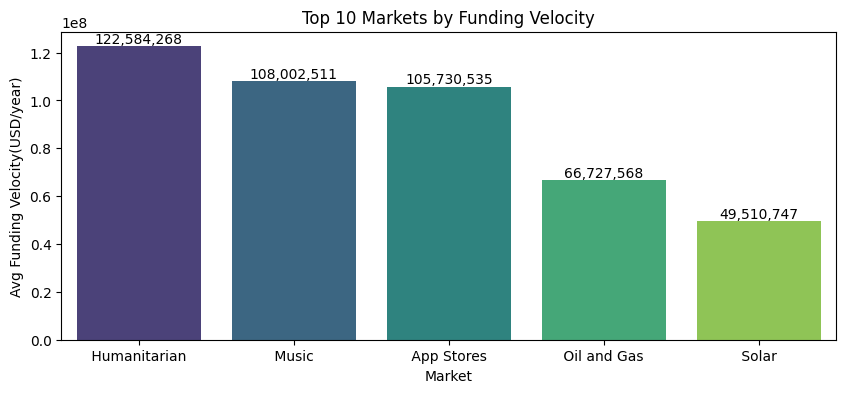

In [ ]:
# Plot top 10 markets by funding velocity
plt.figure(figsize=(10,4))
g=sns.barplot(x='market', y='funding_velocity', data=market_velocity.head(5), palette='viridis')
plt.title('Top 10 Markets by Funding Velocity')
plt.xlabel('Market')
plt.ylabel('Avg Funding Velocity(USD/year)')
plt.xticks(rotation=0, ha='center')
for bars in g.containers:
  g.bar_label(bars, fmt='%.0f', labels=[f'{v:,.0f}' for v in bars.datavalues])
plt.show()



**The top 10 markets with the highest funding velocity are**:

* Humanitarian and Music lead, indicating rapid growth and emerging opportunities.
* Oil & Gas and Solar show strong investor interest, with a focus on traditional energy and sustainability.
* App Stores, Hardware, and Shopping reflect solid growth in tech and consumer markets.
* Niche sectors like TV Production, Vacation Rentals, and Racing are attracting steady investments.

In [ ]:
# Example: If a FinTech industry averages a 5:1 valuation-to-funding ratio, and the total funding is $10M:
df['valuation']=df['funding_total_usd'] * 5

In [ ]:
print(df[['name', 'market', 'funding_total_usd', 'valuation', 'founded_year']].head())

                 name         market  funding_total_usd   valuation  founded_year
0            #waywire          News           1750000.0   8750000.0        2012.0
4  -R- Ranch and Mine       Tourism             60000.0    300000.0        2014.0
5       .Club Domains      Software           7000000.0  35000000.0        2011.0
7             0-6.com   Curated Web           2000000.0  10000000.0        2007.0
8    004 Technologies      Software                 0.0         0.0        2010.0


In [ ]:
# Correlation between funding and valuation
correlation = df[['funding_total_usd', 'valuation']].corr()
print("Correlation between funding and valuation:")
print(correlation)


Correlation between funding and valuation:
                   funding_total_usd  valuation
funding_total_usd                1.0        1.0
valuation                        1.0        1.0


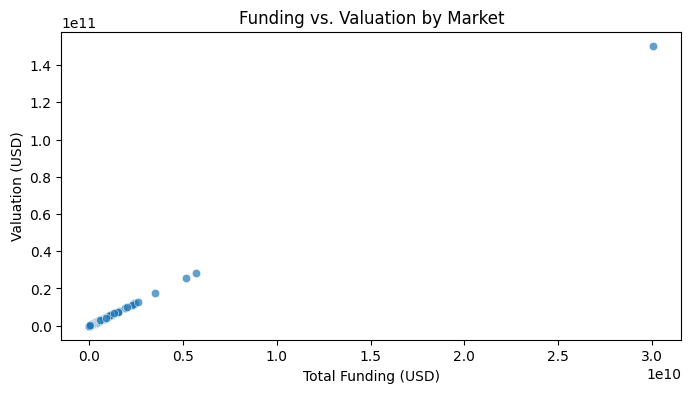

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='funding_total_usd', y='valuation', data=df,alpha=0.7, palette='tab10')
plt.title('Funding vs. Valuation by Market')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Valuation (USD)')
plt.show()


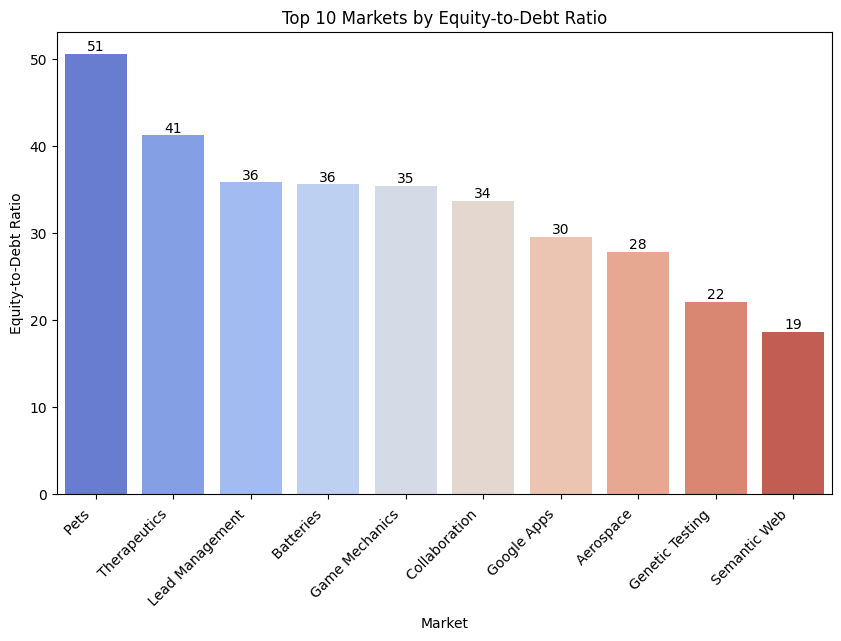

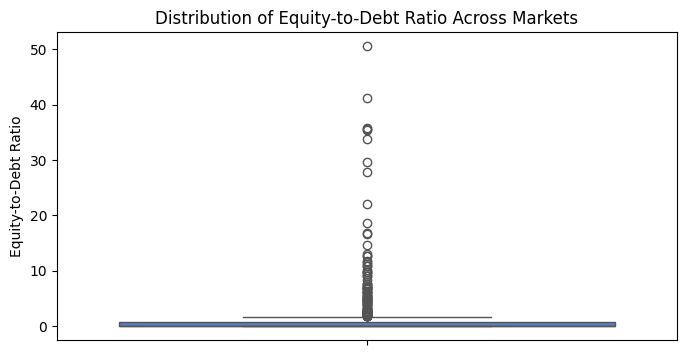

In [ ]:
# Calculate total equity funding (including funding rounds A to F)
df['total_equity_funding'] = (df['venture'] +  df['angel'] + df['private_equity'] +  df['seed'] + df['equity_crowdfunding']+
                              df['post_ipo_equity'] + df['round_A'] + df['round_B'] + df['round_C'] + df['round_D'] + df['round_E'] +
                              df['round_F'] + df['round_G'] + df['round_H'])

# Calculate total debt funding
df['total_debt_funding'] = (df['convertible_note'] + df['debt_financing'] + df['post_ipo_debt'])

# Calculate Equity-to-Debt Ratio
df['equity_debt_ratio'] = df['total_equity_funding'] / df['total_debt_funding']

# Replace infinite or NaN values in the ratio
df['equity_debt_ratio']= df['equity_debt_ratio'].apply(lambda x: np.nan if np.isinf(x) else x)
df['equity_debt_ratio'].fillna(0, inplace=True)

# Group by Market and calculate mean ratios
equity_debt_by_market = df.groupby('market')[['total_equity_funding', 'total_debt_funding', 'equity_debt_ratio']].mean().reset_index()

# Sort by Equity-to-Debt Ratio
top_markets = equity_debt_by_market.sort_values(by='equity_debt_ratio', ascending=False).head(10)

# Plotting the Equity-to-Debt Ratio
plt.figure(figsize=(10,6))
g=sns.barplot(data=top_markets, x='market', y='equity_debt_ratio', palette='coolwarm')
plt.title('Top 10 Markets by Equity-to-Debt Ratio')
plt.xlabel('Market')
plt.ylabel('Equity-to-Debt Ratio')
plt.xticks(rotation=45, ha='right')
for bars in g.containers:
  g.bar_label(bars, fmt='%.0f', labels=[f'{v:,.0f}' for v in bars.datavalues])
plt.show()

# Visualize the distribution of funding
plt.figure(figsize=(8,4))
sns.boxplot(data=equity_debt_by_market, y='equity_debt_ratio', palette='muted')
plt.title('Distribution of Equity-to-Debt Ratio Across Markets')
plt.ylabel('Equity-to-Debt Ratio')
plt.show()


In [ ]:
ddf=df.copy()

In [ ]:
# Adding cumulative funding
round_columns = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
ddf['total_funding'] = ddf[round_columns].sum(axis=1)
for i in range(len(round_columns) - 1):
    current_round = round_columns[i]
    next_round = round_columns[i + 1]
    ddf[f'{current_round}_to_{next_round}_growth'] = (
        (ddf[next_round] - ddf[current_round]) / ddf[current_round]
    ) * 100
# Create a boolean column to indicate if funding increased at each round
ddf['consistent_growth'] = (ddf[round_columns].diff(axis=1) > 0).all(axis=1)


In [ ]:
ddf['consistent_growth'].value_counts()

,count
consistent_growth,
False,35379


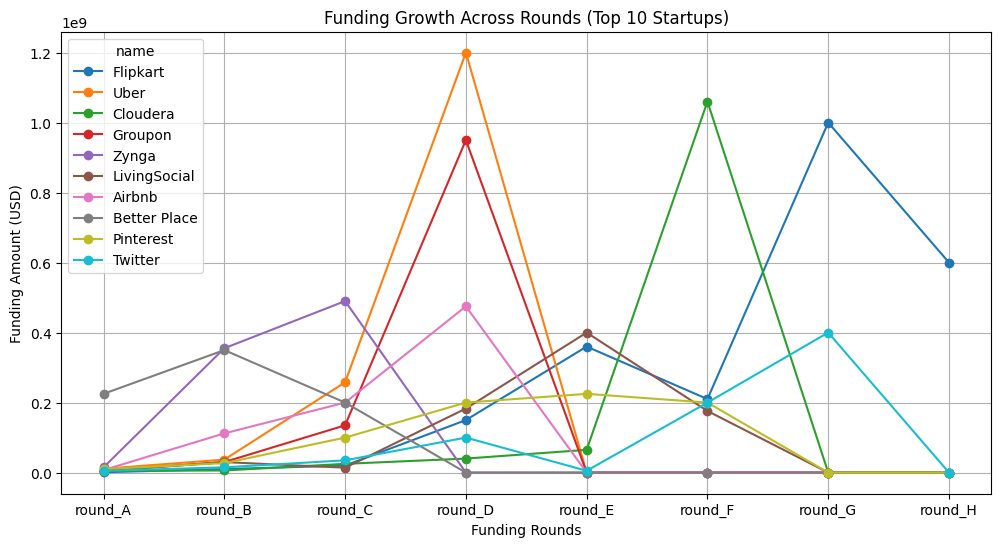

In [ ]:
top_startups = ddf.nlargest(10, 'total_funding')  # Top 10 startups by total funding
top_startups.set_index('name')[round_columns].T.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Funding Growth Across Rounds (Top 10 Startups)")
plt.xlabel("Funding Rounds")
plt.ylabel("Funding Amount (USD)")
plt.grid()
plt.show()

# Hypothesis Testing

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df['funding_total_usd'])
print('Shapiro-Wilk Test: stat=%.3f, p=%.3f' % (stat, p))


Shapiro-Wilk Test: stat=0.031, p=0.000


In [ ]:
from scipy.stats import levene
stat, p = levene(df['funding_total_usd'],df['market'])
print('Levene Test: stat=%.3f, p=%.3f' % (stat, p))


Levene Test: stat=nan, p=nan


In [ ]:
from scipy.stats import f_oneway
# H0 :  The average funding across all markets is the same.
# H1 : The average funding differs for at least one market.

# Group funding data by market
market_funding = df.groupby('market')['funding_total_usd'].apply(list)

# Perform One-Way ANOVA test
f_stat, p_value = f_oneway(*market_funding)

# Results
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: The average funding differs across markets.")
else:
    print("Fail to reject the null hypothesis: No significant difference in funding across markets.")


F-Statistic: 0.23704333197345273, P-Value: 0.9999999999999999
Fail to reject the null hypothesis: No significant difference in funding across markets.


In [ ]:
from scipy.stats import kruskal

# Group funding data by region
region_funding = df.groupby('region')['funding_total_usd'].apply(list)

# Perform Kruskal-Wallis test
h_stat, p_value = kruskal(*region_funding)

# Results
print(f"H-Statistic: {h_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Funding differs significantly between regions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in funding between regions.")


H-Statistic: 4114.422648932073, P-Value: 0.0
Reject the null hypothesis: Funding differs significantly between regions.


In [ ]:
from scipy.stats import pearsonr

# Remove NaN values for testing
seed_venture_data = df[['seed', 'venture']].dropna()

# Perform Pearson correlation test
corr, p_value = pearsonr(seed_venture_data['seed'], seed_venture_data['venture'])

# Results
print(f"Correlation Coefficient: {corr}, P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation between seed and venture funding.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between seed and venture funding.")


Correlation Coefficient: -0.015089071076506418, P-Value: 0.0045367200624364026
Reject the null hypothesis: Significant correlation between seed and venture funding.


In [ ]:
from scipy.stats import f_oneway

# H0 :  The average funding across all status is the same.
# H1 : The average funding differs for at least one status.

# Separate funding data for active and closed startups
active_funding = df[df['status'] == 'operating']['funding_total_usd'].dropna()
closed_funding = df[df['status'] == 'closed']['funding_total_usd'].dropna()
operating_funding = df[df['status'] == 'operating']['funding_total_usd'].dropna()

# Perform two-sample t-test
f_stat, p_value = f_oneway(active_funding, closed_funding,operating_funding)

# Results
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: The average funding differs across status of startups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in funding between status of startups.")


F-Statistic: 1.1246374509748063, P-Value: 0.3247768431056756
Fail to reject the null hypothesis: No significant difference in funding between status of startups.


In [ ]:
from scipy.stats import ttest_ind

# Separate funding data for active and closed startups
active_funding = df[df['status'] == 'operating']['funding_total_usd'].dropna()
closed_funding = df[df['status'] == 'closed']['funding_total_usd'].dropna()

# Perform two-sample t-test
t_stat, p_value = ttest_ind(active_funding, closed_funding)

# Results
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Funding differs significantly between active and closed startups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in funding between active and closed startups.")


T-Statistic: 1.4986728697672715, P-Value: 0.13396849327823057
Fail to reject the null hypothesis: No significant difference in funding between active and closed startups.


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['market'], df['funding_rounds'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Results
print(f"Chi-Square Statistic: {chi2_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Funding rounds are associated with specific markets.")
else:
    print("Fail to reject the null hypothesis: No significant association between funding rounds and markets.")


Chi-Square Statistic: 9889.917170496228, P-Value: 1.0
Fail to reject the null hypothesis: No significant association between funding rounds and markets.


In [ ]:
# Group funding data by country
country_funding = df.groupby('country_code')['funding_total_usd'].apply(list)

# Perform Kruskal-Wallis test for non-normal distributions
h_stat, p_value = kruskal(*country_funding)

# Results
print(f"H-Statistic: {h_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Funding differs significantly between countries.")
else:
    print("Fail to reject the null hypothesis: No significant difference in funding between countries.")


H-Statistic: 1529.9612429227366, P-Value: 1.5245711578164713e-238
Reject the null hypothesis: Funding differs significantly between countries.


In [ ]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H', 'total_funding_usd', 'country_domain', 'founded_year_extract', 'is_niche', 'total_no_years', 'funding_velocity', 'valuation', 'total_equity_funding', 'total_debt_funding', 'equity_debt_ratio'], dtype='object')

In [ ]:
c=df[['funding_total_usd','seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel',
    'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding',
    'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].corr()

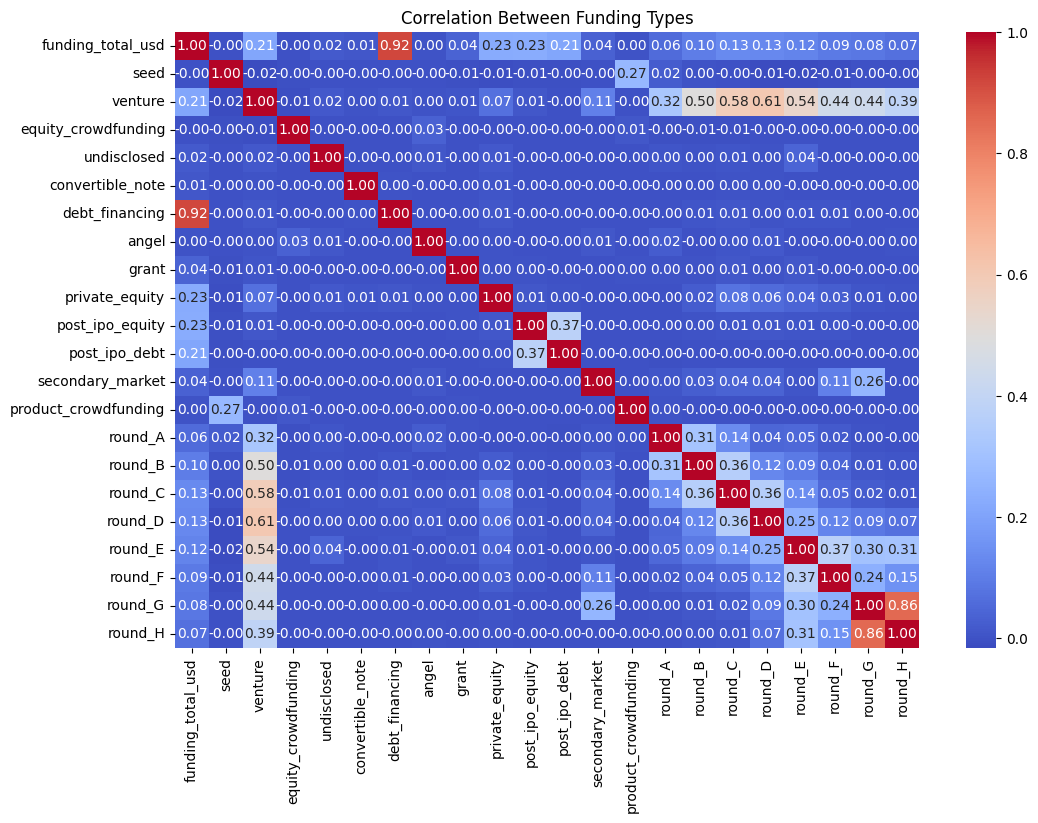

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(c, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Funding Types')
plt.show()

In [ ]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=aa82f40b2959c7da26a8fff4a3544540516f92084b51b27c955ff16823ed4d71
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


                  name                 market founded_at   duration  event
0             #waywire                  News  2012-06-01  12.484932      1
4   -R- Ranch and Mine               Tourism  2014-01-01  10.898630      0
5        .Club Domains              Software  2011-10-10  13.128767      0
7              0-6.com           Curated Web  2007-01-01  17.904110      0
8     004 Technologies              Software  2010-01-01  14.901370      0
10         1,2,3 Listo            E-Commerce  2012-01-01  12.901370      0
12       1-800-DENTIST   Health and Wellness  1986-01-01  38.917808      0
13       1-800-DOCTORS   Health and Wellness  1984-01-01  40.920548      0
14    1.618 Technology           Real Estate  2013-12-07  10.967123      0
15     10 Minutes With             Education  2013-01-01  11.898630      0


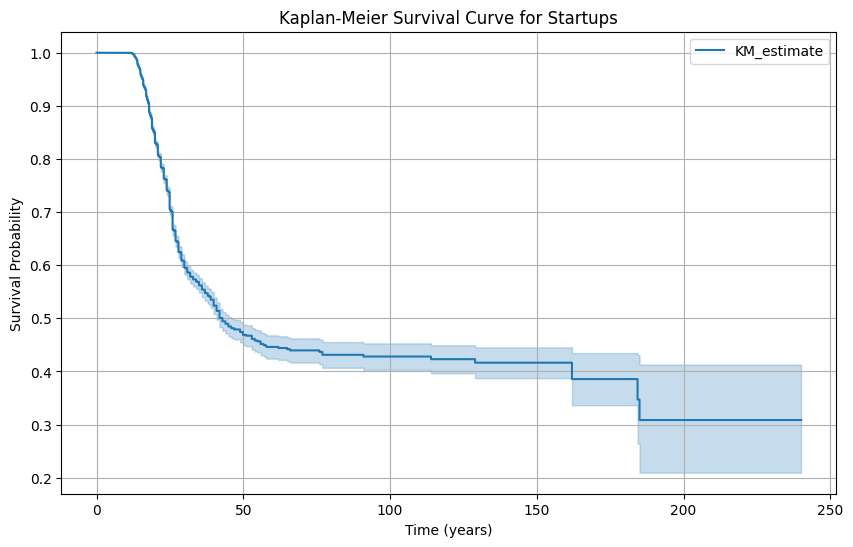

In [ ]:
from datetime import datetime
from lifelines import KaplanMeierFitter

# Convert dates to datetime format
ddf['founded_at'] = pd.to_datetime(ddf['founded_at'])

# Create "duration" column (time from founding to the current date or event)
current_date = datetime.now()
ddf['duration'] = (current_date - ddf['founded_at']).dt.days / 365  # Convert to years

# Encode the "event" column (1 if acquired/closed, 0 if operating)
ddf['event'] = np.where(ddf['status'].isin(['acquired', 'closed']), 1, 0)

# View the prepared data
print(ddf[['name', 'market', 'founded_at', 'duration', 'event']].head(10))

# Initialize Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

# Fit the data
kmf.fit(ddf['duration'], event_observed=ddf['event'])

# Plot the survival function
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve for Startups')
plt.xlabel('Time (years)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


In [ ]:
df['founded_q']=df['founded_quarter'].str.split('-').str[1]

In [ ]:
quarterly_funding = df.groupby('founded_q')['funding_total_usd'].sum().reset_index()
quarterly_funding.columns = ['Quarter', 'Total_Funding']
#quarterly_funding['Total_Funding']=quarterly_funding['Total_Funding'].apply(lambda x: f'{x:.2f}')
quarterly_funding

,Quarter,Total_Funding
0,Q1,4.014075e+11
1,Q2,3.239355e+10
2,Q3,3.211267e+10
3,Q4,6.499367e+10


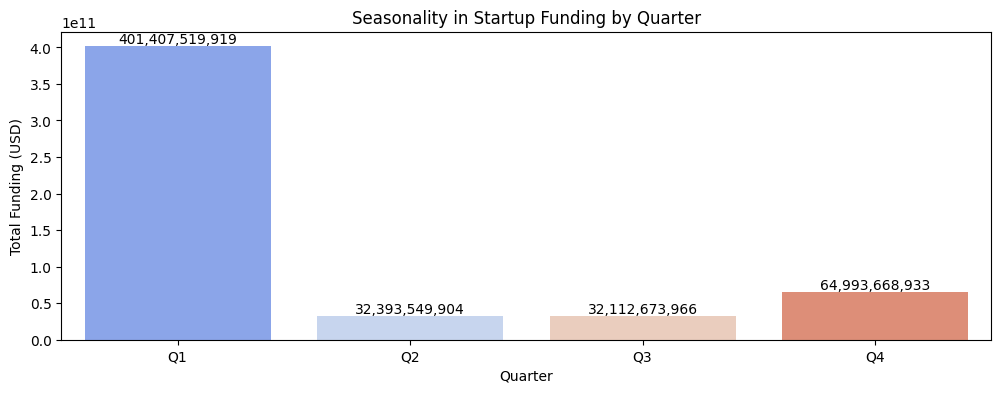

In [ ]:
plt.figure(figsize=(12,4))
g=sns.barplot(data=quarterly_funding,x='Quarter', y='Total_Funding', palette="coolwarm")
plt.title("Seasonality in Startup Funding by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Funding (USD)")
for bars in g.containers:
  g.bar_label(bars, fmt='%.0f', labels=[f'{v:,.0f}' for v in bars.datavalues])
plt.show()

In [ ]:
df.sample(2)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,total_funding_usd,country_domain,founded_year_extract,is_niche,total_no_years,funding_velocity,valuation,total_equity_funding,total_debt_funding,equity_debt_ratio,founded_q
41570,/organization/synergene-therapeutics,SynerGene Therapeutics,NaN,|Biotechnology|,Biotechnology,3951000.0,operating,USA,MD,"Washington, D.C.",Potomac,2.0,1998-01-01,1998-01,1998-Q1,1998.0,2011-09-14,2014-04-02,0.0,3951000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3951000.0,None,1970.0,Non-Niche,16.260274,242984.84,19755000.0,3951000.0,0.0,0.0,Q1
37868,/organization/shape-up-the-nation,ShapeUp,http://www.shapeup.com,|Fitness|Health Care Information Technology|He...,Health and Wellness,12500000.0,operating,USA,RI,Providence,Providence,3.0,2006-01-01,2006-01,2006-Q1,2006.0,2010-08-16,2013-11-05,0.0,10000000.0,0.0,0.0,0.0,2500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000000.0,5000000.0,0.0,0.0,0.0,0.0,0.0,0.0,22500000.0,com,1970.0,Non-Niche,7.849315,1592495.64,62500000.0,20000000.0,2500000.0,8.0,Q1


In [ ]:
df['month']=df['founded_month'].str.split('-').str[1]

In [ ]:
monthly_funding = df.groupby('month')['funding_total_usd'].sum().reset_index()
monthly_funding.columns = ['Month', 'Total_Funding']
monthly_funding['Month'] = monthly_funding['Month'].astype(int)
#monthly_funding['Total_Funding']=monthly_funding['Total_Funding'].apply(lambda x: f'{x:.2f}' if pd.notnull(x) else x)
monthly_funding

,Month,Total_Funding
0,1,3.747199e+11
1,2,1.390294e+10
2,3,1.278467e+10
3,4,8.967496e+09
4,5,1.076845e+10
5,6,1.265760e+10
6,7,9.282903e+09
7,8,1.048454e+10
8,9,1.234523e+10
9,10,4.646881e+10


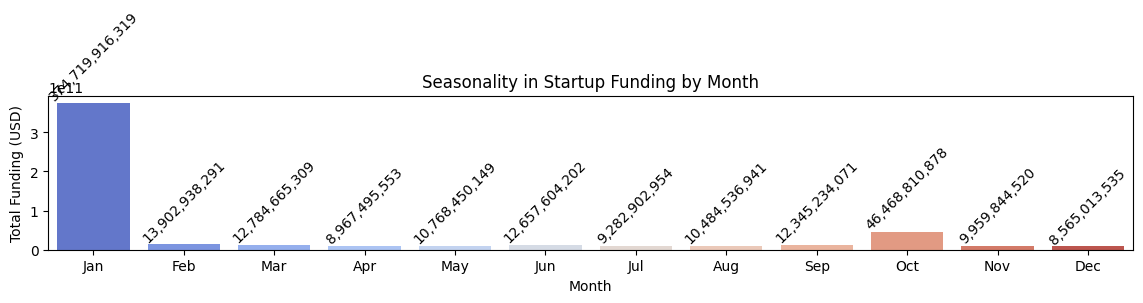

In [ ]:
plt.figure(figsize=(14,2))
g=sns.barplot(data=monthly_funding,x='Month', y='Total_Funding', palette="coolwarm")
plt.title("Seasonality in Startup Funding by Month")
plt.xlabel("Month")
plt.ylabel("Total Funding (USD)")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
for bars in g.containers:
  g.bar_label(bars, fmt='%.0f', labels=[f'{v:,.0f}' for v in bars.datavalues],rotation=45)
plt.show()

**Increased Funding in Q1, Particularly in January:** The data shows a significant rise in funding during the first quarter, with January seeing the highest amount of investments, indicating strong investor activity at the start of the year.

In [ ]:
def plot_top_10_counts_with_hue(df, column_name, hue_column='status'):
    """
    Plots a count plot of the top 10 most frequent values in a specified column, with a hue,
    displaying counts on the bars.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The column name to analyze (e.g., 'market', 'city').
    - hue_column (str): The column name to use for hue (default is 'status').
    """
    # Get the top 10 most frequent values in the specified column excluding 'Unknown'
    top_10_values = df[column_name].value_counts().head(10).index

    # Filter the DataFrame for rows with top 10 values in the specified column
    df_top_10 = df[df[column_name].isin(top_10_values) & (df[column_name] != 'Unknown')]

    # Count Plot with Hue
    plt.figure(figsize=(14, 4))
    ax = sns.countplot(data=df_top_10, x=column_name, hue=hue_column, palette='viridis')
    plt.title(f'Top 10 {column_name.capitalize()} by Count with Hue="{hue_column.capitalize()}"')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Display the count values on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.legend(title=hue_column.capitalize())
    plt.show()



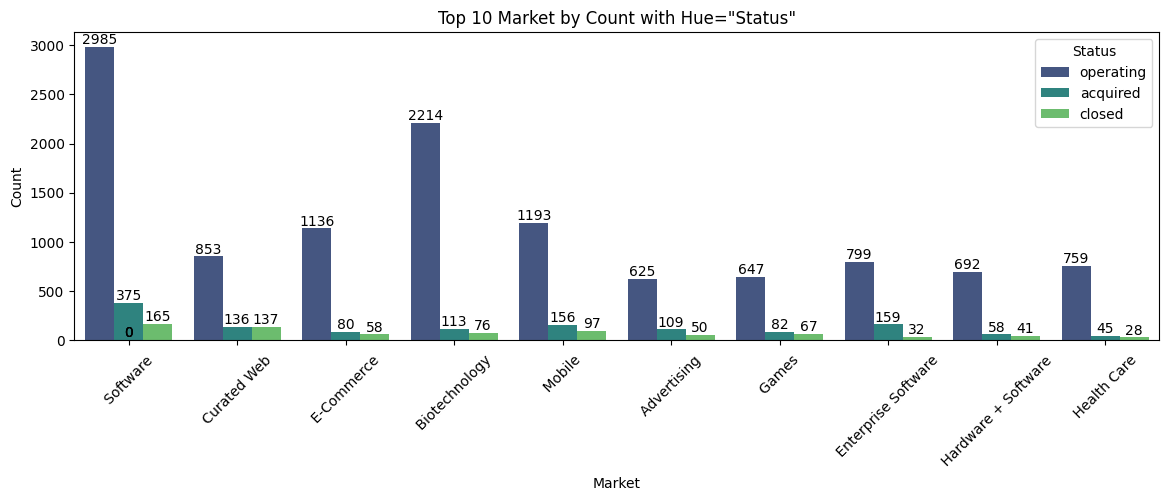

In [ ]:
plot_top_10_counts_with_hue(df, column_name='market', hue_column='status')

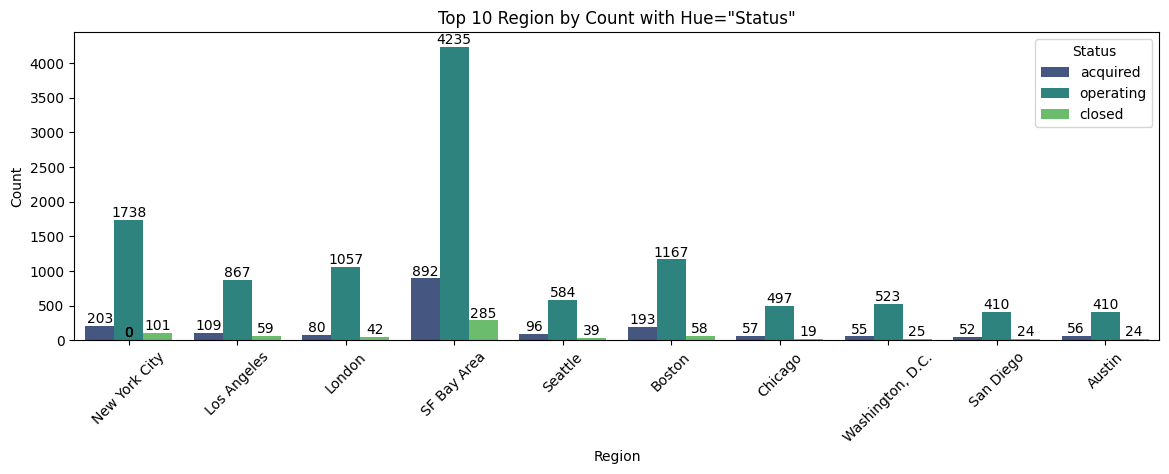

In [ ]:
plot_top_10_counts_with_hue(df, column_name='region', hue_column='status')

## Recommendations for markets and regions

| **Key Area**                 | **Top 10 Markets**                                  | **Top 10 Regions**                                    |
|------------------------------|-----------------------------------------------------|-------------------------------------------------------|
| **Investment Focus**          | Focus on high-activity markets like **Games**, **Software**, and **Curated Web**. Prioritize **operating** and **acquired** companies. | Focus on **NYC**, **SF Bay Area**. Prioritize **operating** companies and explore **acquired** ones for insights. |
| **Diversification**           | Diversify into **E-commerce**, **Biotech**, and **Mobile** markets. Focus on **operating companies** for growth. | Diversify across **London**, **LA**, **Seattle**, and **Boston**. Focus on **operating** regions for balanced risk. |
| **Emerging Opportunities**    | Explore **Hardware + Software**, **Clean Tech**, and **Health Care** for growth. Target **operating** companies. | Explore **Chicago**, **DC**, **Denver**, and **San Diego** for growth. Focus on **operating** companies in these regions. |
| **Due Diligence**             | Assess **market size**, **competition**, and **regulations**. Learn from **closed** companies. | Evaluate **economic stability** and **ease of business**. Learn from **closed** regions and **acquired** companies. |
| **Strategic Partnerships**    | Partner with **top-performing companies** in growth markets. | Partner with **local VCs** and **accelerators** in top regions. Focus on **operating companies** for scalability. |
| **Long-term Strategy**        | Invest for **long-term growth** in high-potential markets. | Focus on **sustained growth** in mature regions and **operating companies**. |


In [ ]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H', 'total_funding_usd', 'country_domain', 'founded_year_extract', 'is_niche', 'total_no_years', 'funding_velocity', 'valuation', 'total_equity_funding', 'total_debt_funding', 'equity_debt_ratio', 'founded_q', 'month'], dtype='object')

In [ ]:
df[['name','funding_total_usd']].sort_values(by='funding_total_usd',ascending=False).head(5)

,name,funding_total_usd
45815,Verizon Communications,3.007950e+10
8664,Clearwire,5.700000e+09
7977,Charter Communications,5.162513e+09
15315,First Data Corporation,3.500000e+09
38289,sigmacare,2.600000e+09


# Insights for Investors:

**Top Markets by Funding:**

**Total Funding:** Biotechnology, Mobile, Software, Clean Technology, and Healthcare are the leading markets, indicating robust investment opportunities in tech-driven and sustainable sectors.

 **Average Funding:** Markets like Natural Gas Uses, Oil & Gas, and Trading offer high-value investments, suggesting these sectors provide attractive returns.

**Funding Velocity:** Humanitarian and Music sectors show rapid growth, while Oil & Gas, Solar, and App Stores indicate high investor interest, with quick returns.
Geographic Investment Opportunities:


**Top Countries by Funding:**
The USA, China, the UK, India, and Canada are dominant in funding, making them key regions for investors looking for well-established markets with strong startup ecosystems.

 **Top Regions by Funding:** The SF Bay Area, New York City, and Boston offer substantial funding, while regions like West Sussex and Butleigh Heads show high average funding per startup.

 **Top States and Cities by Funding:** California, New York, and Massachusetts lead in total funding, with cities like New York, San Francisco, and Beijing receiving the most investment, signaling strong startup activity in these regions.
Emerging Investment Opportunities:

 **Funding Velocity:** Markets with the highest funding velocity (Humanitarian, Music, Oil & Gas, and Solar) suggest emerging opportunities for investors looking for rapid growth.

 **Increased Funding in Q1:** January shows the highest funding levels, reflecting heightened investor activity at the start of the year. Investors should consider planning major investments in Q1 for maximum returns.

 **Economic Trends for Investment Strategy:**

 **Non-Niche Markets Lead:** Non-niche markets (tech, healthcare) attract the highest funding, with the most funding rounds. Investors should focus on these markets for larger volumes of investment opportunities.

 **Venture Funding Dominates:** Venture funding is the dominant source of capital, signifying that investors should focus on startups in the early to growth stages, as they attract the most capital.

**Market and Regional Trends:**

 **Regional Funding Variations:** Significant funding differences across regions indicate that some areas, like the SF Bay Area and New York City, are more lucrative for investment than others. This can help investors focus on regions with better access to capital.

**YoY Growth:** Monitoring Year-over-Year growth in funding can reveal long-term trends, showing whether certain markets or regions are gaining or losing investor interest over time.


**Insights for Startups:**

**Market Focus for Startups:**

**Top Markets by Average Funding:** Startups in high average funding markets like Natural Gas Uses, Oil & Gas, and Trading can secure larger investments. Startups should consider entering these markets for higher-value investments.

**Top Markets by Founding Count:** Software, Biotechnology, and Mobile are the most popular markets, indicating where there is high startup activity. New startups should consider these areas for greater networking and investor interest.

**Geographic Focus for Startups:**

**Top Countries by Funding:** The USA, China, UK, and Canada receive the most funding, making them ideal locations for startups to attract international investors.

**Top Regions and Cities by Funding:** Startups in the SF Bay Area, New York City, and Boston have a higher likelihood of attracting funding, as these regions are startup hubs.

**Top States and Cities by Founding Count:** States like California and New York, along with cities like San Francisco and New York, have the highest number of startups. Startups should establish themselves in these locations for better networking and investment opportunities.

**Funding Trends to Watch for Startups:**

**Funding Velocity:** Markets with high funding velocity, like Humanitarian and Music, indicate rapid growth and emerging opportunities. Startups in these sectors may experience quick capital inflows.

**Seasonality and Timing:** Significant funding increases in Q1, especially in January, suggest that startups should time their fundraising efforts early in the year for maximum investor interest and availability of funds.

**Funding Round Strategy:**

**Venture Funding Dominance:** Most funds come through venture funding rounds. Startups should focus on securing venture capital for expansion and scaling, as it remains the primary source of capital.

**Seed vs. Venture:** A strong correlation between seed and venture
funding suggests that startups securing seed funding can transition to venture funding more easily, making it crucial for early-stage startups to seek seed funding for growth.

**Non-Niche vs. Niche Markets for Startups:**

**Non-Niche Markets Lead:** Startups in non-niche markets (tech, healthcare) receive more funding on average, indicating that these sectors are more attractive to investors. Startups in these markets may have greater access to investment capital.

**Niche Markets:** Startups in niche markets like TV Production and Racing still attract consistent investments, though at a slower pace compared to non-niche markets. Niche markets may offer targeted opportunities with specific investor interest.
Regional Funding Insights for Startups:

**Funding Disparity Across Regions:** Startups in regions like SF Bay Area and New York City have access to larger pools of capital. New startups may consider establishing their businesses in these regions to increase their chances of securing funding.
Economic and YoY Insights for Startups:

**YoY Growth:** Monitoring Year-over-Year growth in funding across markets can help startups assess long-term trends and potential shifts in investor behavior. Emerging markets with strong YoY growth could provide new opportunities for investment.

**Market Saturation:** Some markets show no significant funding differences, suggesting that certain sectors may be saturated with competition. Startups in such markets should focus on innovation to differentiate themselves.

**Recommendations For Investors:**

**Focus on Emerging Markets:**

Humanitarian, Music, and App Stores markets are growing rapidly and offer emerging opportunities. Investors should consider allocating resources to these sectors as they exhibit high funding velocity, indicating rapid growth and potential for future returns.

**Invest in Non-Niche Markets:**

Non-niche markets, particularly those in technology (e.g., Software) and healthcare, are attracting the largest volumes of investment and consistently show high average funding per startup. These markets offer more mature investment opportunities with stable growth, which can be appealing for long-term investors.

**Consider Traditional and Sustainable Sectors:**

While Oil & Gas and Solar might appear different, both sectors offer significant investor interest. Investors should consider balancing their portfolios with investments in both traditional energy sectors (Oil & Gas) and renewable energy sectors (Solar) to mitigate risk and capitalize on global trends.

**Target High Growth Periods:**

Q1, particularly January, shows the highest funding activity. Investors should plan and allocate capital strategically during this period, taking advantage of increased investment momentum at the start of the year.

**Diversify Geographic Exposure:**

The USA, China, and the UK consistently lead in terms of total funding. However, don’t overlook emerging regions such as SF Bay Area, New York City, and Boston for diversified investment portfolios, especially in rapidly growing industries.

**Evaluate Funding Rounds for Better Opportunities:**

There is a significant correlation between seed and venture funding. Investors should consider identifying and nurturing startups during their seed stage for better long-term investment returns as they transition to venture funding.

**Recommendations For Startups:**

**Focus on High-Growth Markets:**

If you are operating in markets like Biotechnology, Mobile, Software, Clean Technology, or Healthcare, you are in sectors that attract substantial funding. Tailor your business model to tap into these high-growth areas and stay ahead of emerging trends.

**Leverage Venture Funding:**

Venture funding is the dominant source of capital. Focus on refining your business model to meet the criteria that attract venture capitalists, such as scalability, innovation, and a high potential for return on investment.

**Consider Timing Your Funding Rounds:**

Given the increased funding in Q1, particularly January, startups should consider aligning their funding rounds during this period to increase the likelihood of securing investment when investor activity peaks.

**Evaluate Market Trends:**

Non-niche markets are seeing higher average total funding and funding counts. If you operate in a niche market, consider whether expanding into related non-niche areas might enhance your appeal to investors.

**Seek Investments in High Funding Regions:**

Focus your efforts in markets and regions that attract more funding. For example, areas like the SF Bay Area, New York City, and Boston are prominent startup hubs. Expanding your operations or networking in these areas could increase your chances of securing funding.

**Maximize the Value Proposition in Traditional Sectors:**

While Oil & Gas and Solar sectors have traditionally been strong investment areas, exploring sustainability and innovation within these fields can open up funding opportunities, particularly from investors focused on future growth and sustainability.

**Build a Strong Investor Network:**

Cultivate relationships with investors early on, especially those interested in your market. By understanding investor interests and aligning your goals with those of potential investors, you can position your startup for better funding opportunities.
